In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import folium
import seaborn as sns
import numpy as np
import plotly.express as px
import dash
from dash import dcc, html
import plotly.graph_objs as go

In [2]:
amazon = pd.read_csv('data/Lab3/Amazon.csv')

In [3]:
amazon.drop(['product_link', 'img_link', 'review_content', 'review_title', 'review_id', 'user_name', 'user_id', 'about_product'], axis=1, inplace=True)
amazon = amazon.drop_duplicates(subset=['product_id'])

In [4]:
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363"
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905"


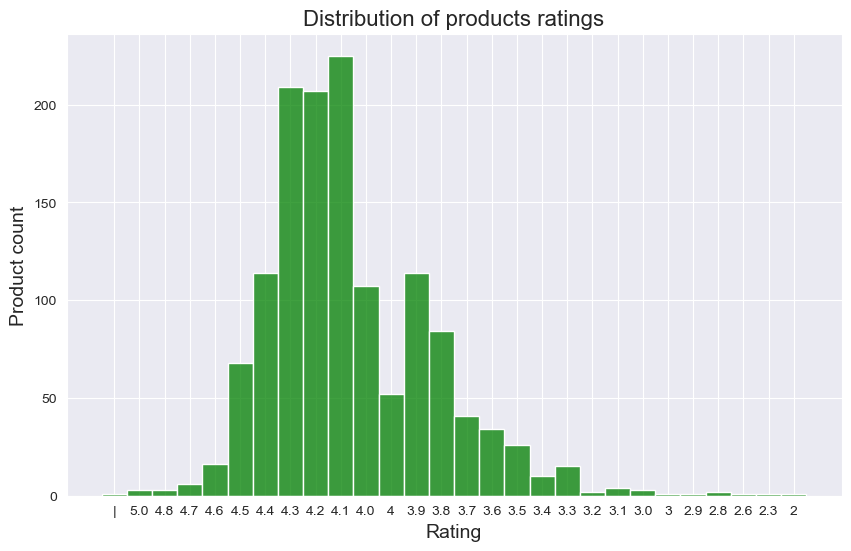

In [5]:
# Zaokrąglanie ocen do jednego miejsca po przecinku
amazon['rounded_rating'] = amazon['rating'].round(1)
# Tworzenie histogramu z posortowanymi ocenami
plt.figure(figsize=(10, 6))
sorted_ratings = amazon['rounded_rating'].dropna().sort_values(ascending=False)  # Sortowanie ocen od najwyższej
sns.histplot(sorted_ratings, bins=20, kde=False, color='green', discrete=True)

# Dodanie tytułów i etykiet
plt.title('Distribution of products ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Product count', fontsize=14)
plt.xticks(sorted(amazon['rounded_rating'].dropna().unique(), reverse=True))  # Oś X posortowana
plt.show()

In [6]:
print(amazon['category'].value_counts())

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          161
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|WearableTechnology|SmartWatches                                                                                 62
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               60
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                51
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

In [7]:
# Wyświetlenie tylko unikalnych kategorii
print(amazon['category'].unique())
print(amazon['category'].count())

['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables'
 'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls'
 'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables'
 'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables'
 'Electronics|HomeTheater,TV&Video|Projectors'
 'Electronics|HomeAudio|Accessories|Adapters'
 'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers'
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables'
 'Electronics|HomeTheater,TV&

In [8]:
amazon['category'] = amazon['category'].str.split('|').str[0]
amazon.head(1500)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,rounded_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269",4.2
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,"43,994",4.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928",3.9
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,"94,363",4.2
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,"16,905",4.2
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,₹379,₹919,59%,4,"1,090",4
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,"₹2,280","₹3,045",25%,4.1,"4,118",4.1
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,"₹2,219","₹3,080",28%,3.6,468,3.6
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Home&Kitchen,"₹1,399","₹1,890",26%,4,"8,031",4


In [9]:
print(amazon['category'].count())
print(amazon['category'].unique())
print(amazon['category'].value_counts())

1351
['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']
category
Electronics              490
Home&Kitchen             448
Computers&Accessories    375
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


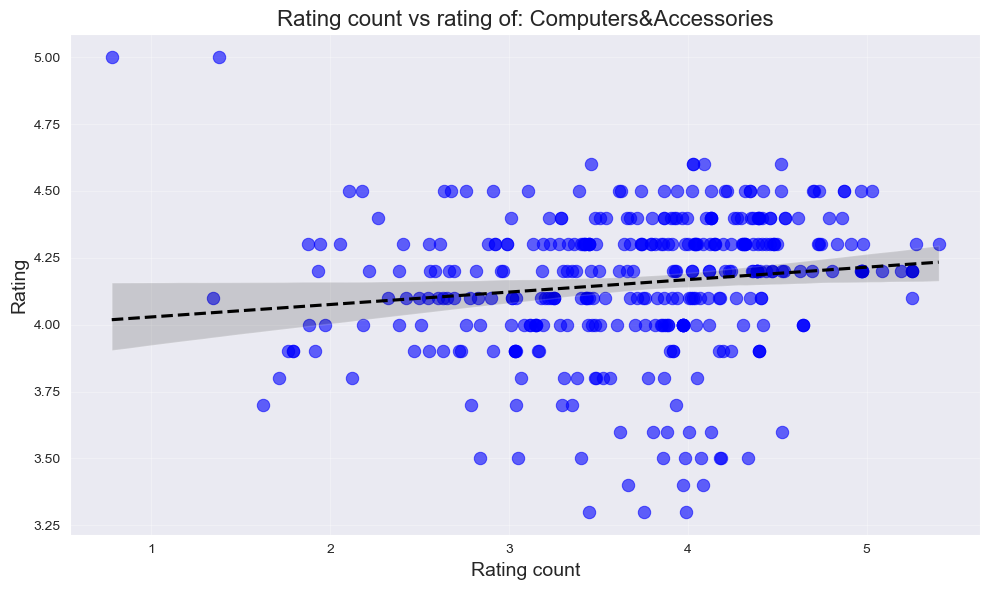

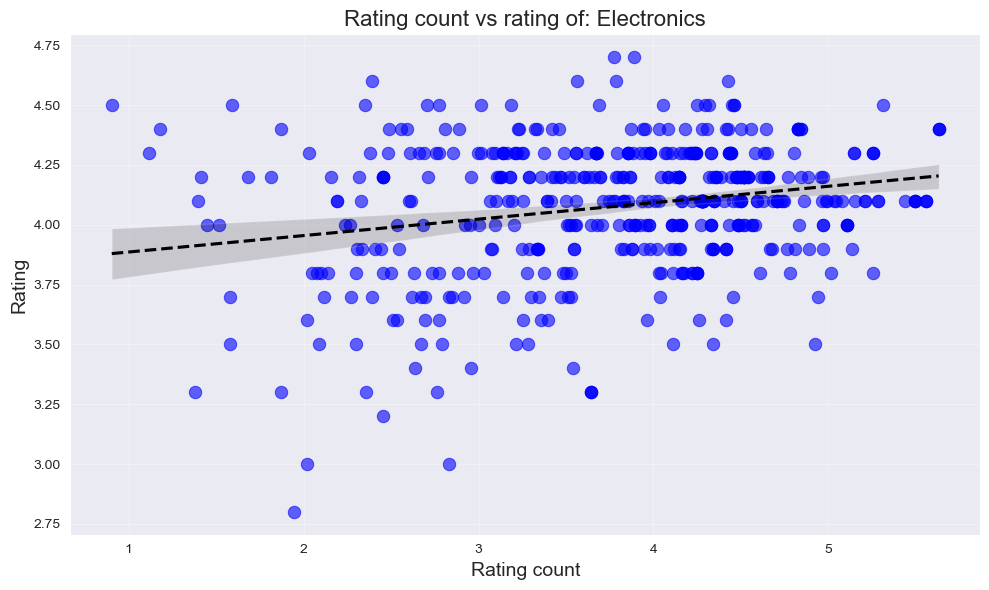

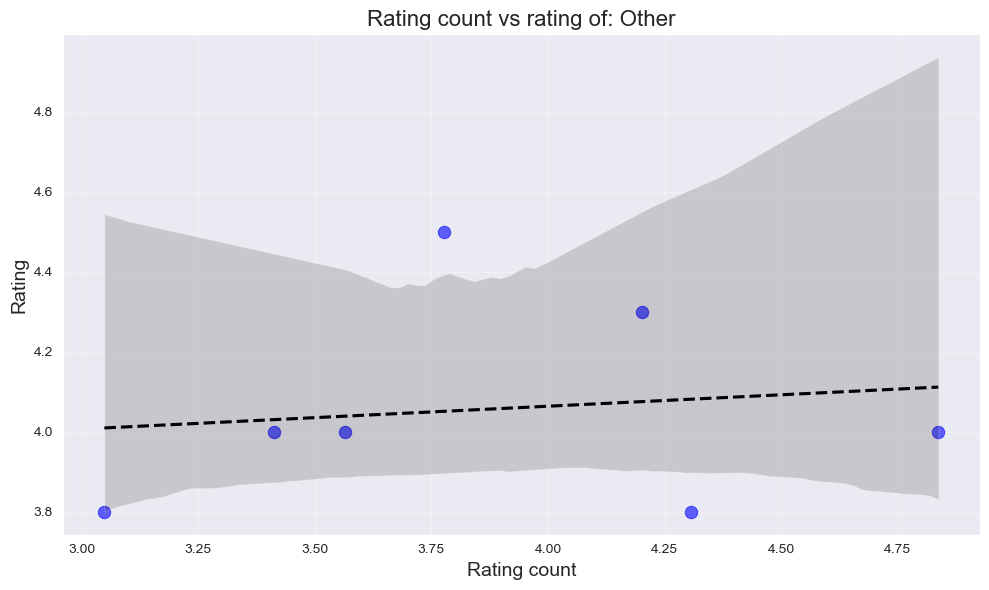

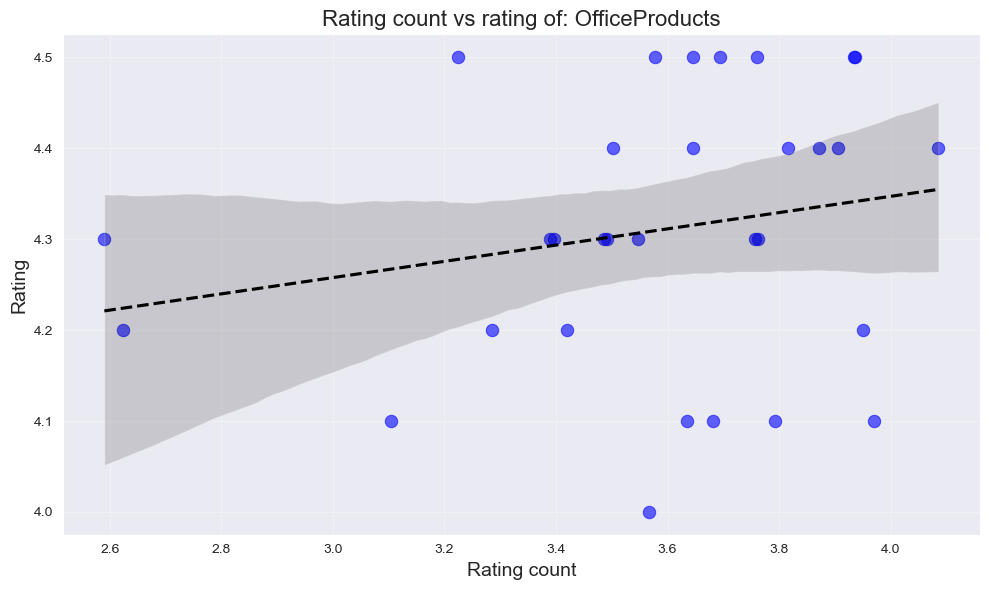

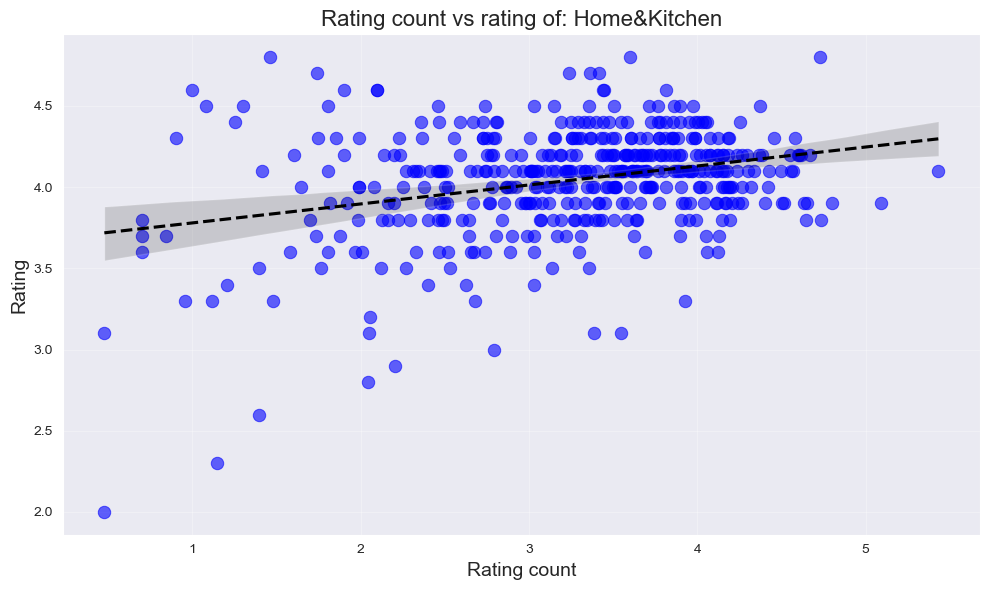

In [10]:
# Usuwanie przecinków w kolumnie 'rating_count' i konwersja na liczbę
amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').astype(float)

# Konwersja kolumny 'rating' na numeryczną
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

# Dodanie kolumny z logarytmem liczby ocen (wraz z korektą błędów)
amazon['log_rating_count'] = np.log10(amazon['rating_count'] + 1)
# Funkcja mapująca kategorie
def map_category(category_for_general):
    category_mapping = {
        'Home&Kitchen': 'Home&Kitchen',
        'Electronics': 'Electronics',
        'Computers&Accessories': 'Computers&Accessories',
        'OfficeProducts': 'OfficeProducts'
    }
    
    # Sprawdzanie, czy kategoria pasuje do category_mapping
    if category_for_general in category_mapping:
        return category_mapping[category_for_general]
    
    # Jeśli żadna kategoria nie pasuje, przypisujemy 'Other'
    return 'Other'

# Tworzenie ogólnych kategorii
amazon['category2'] = amazon['category']
amazon['general_category'] = amazon['category2'].apply(map_category)



# Scatter plot dla każdej kategorii
categories = amazon['general_category'].unique()

for category in categories:
    plt.figure(figsize=(10, 6))
    category_data = amazon[amazon['general_category'] == category]
    
    sns.scatterplot(data=category_data, 
                    x='log_rating_count', 
                    y='rating', 
                    alpha=0.6, 
                    edgecolor=None, 
                    s=80, 
                    color='blue')
    
    sns.regplot(data=category_data, 
                x='log_rating_count', 
                y='rating', 
                scatter=False, 
                color='black', 
                line_kws={'linestyle': '--'})
    
    # Tytuły i osie
    plt.title(f'Rating count vs rating of: {category}', fontsize=16)
    plt.xlabel('Rating count', fontsize=14)
    plt.ylabel('Rating', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


In [11]:
amazon.head(400)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,rounded_rating,log_rating_count,category2,general_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,24269.0,4.2,4.385070,Computers&Accessories,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,43994.0,4.0,4.643403,Computers&Accessories,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,7928.0,3.9,3.899218,Computers&Accessories,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,94363.0,4.2,4.974806,Computers&Accessories,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,16905.0,4.2,4.228041,Computers&Accessories,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,Electronics,₹379,₹999,62%,4.1,363713.0,4.1,5.560760,Electronics,Electronics
401,B07WDKLRM4,"iQOO Z6 44W by vivo (Lumina Blue, 4GB RAM, 128...",Electronics,"₹13,999","₹19,999",30%,4.1,19252.0,4.1,4.284498,Electronics,Electronics
402,B0BP18W8TM,"Fire-Boltt Gladiator 1.96"" Biggest Display Sma...",Electronics,"₹3,999","₹9,999",60%,4.4,73.0,4.4,1.869232,Electronics,Electronics
404,B07GXHC691,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,Electronics,₹99,₹499,80%,4.3,42641.0,4.3,4.629838,Electronics,Electronics


In [12]:
# Użycie groupby, aby uzyskać liczbę produktów w każdej kategorii
category_counts_groupby = amazon.groupby('general_category').size()
wszystkie = amazon['product_id'].count()
# Wyświetlenie wyników
print(category_counts_groupby)
print(wszystkie)

general_category
Computers&Accessories    375
Electronics              490
Home&Kitchen             448
OfficeProducts            31
Other                      7
dtype: int64
1351


In [13]:
# Usunięcie znaku waluty z kolumny 'discounted_price' i konwersja na liczbę
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
amazon['discounted_price'] = pd.to_numeric(amazon['discounted_price'], errors='coerce')

# Usunięcie znaku waluty z kolumny 'actual_price' i konwersja na liczbę
amazon['actual_price'] = amazon['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
amazon['actual_price'] = pd.to_numeric(amazon['actual_price'], errors='coerce')

# Sprawdzamy kilka przykładów, aby upewnić się, że konwersja przebiegła poprawnie
print(amazon[['discounted_price', 'actual_price']].head())

# Usunięcie wierszy, gdzie ceny są NaN (opcjonalne, w zależności od wymagań analizy)
amazon = amazon.dropna(subset=['discounted_price', 'actual_price'])


   discounted_price  actual_price
0             399.0        1099.0
1             199.0         349.0
2             199.0        1899.0
3             329.0         699.0
4             154.0         399.0


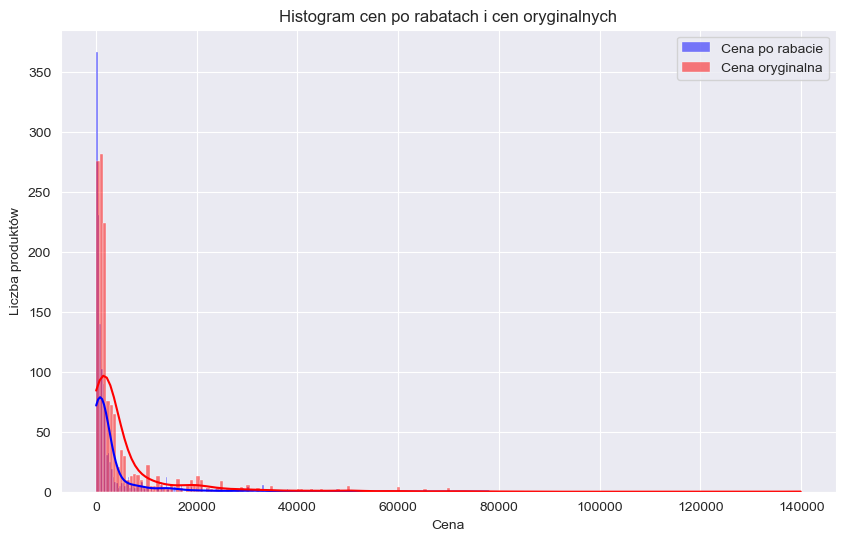

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon['discounted_price'], kde=True, color='blue', label='Cena po rabacie')
sns.histplot(amazon['actual_price'], kde=True, color='red', label='Cena oryginalna')
plt.legend()
plt.title('Histogram cen po rabatach i cen oryginalnych')
plt.xlabel('Cena')
plt.ylabel('Liczba produktów')
plt.grid(True)
plt.show()


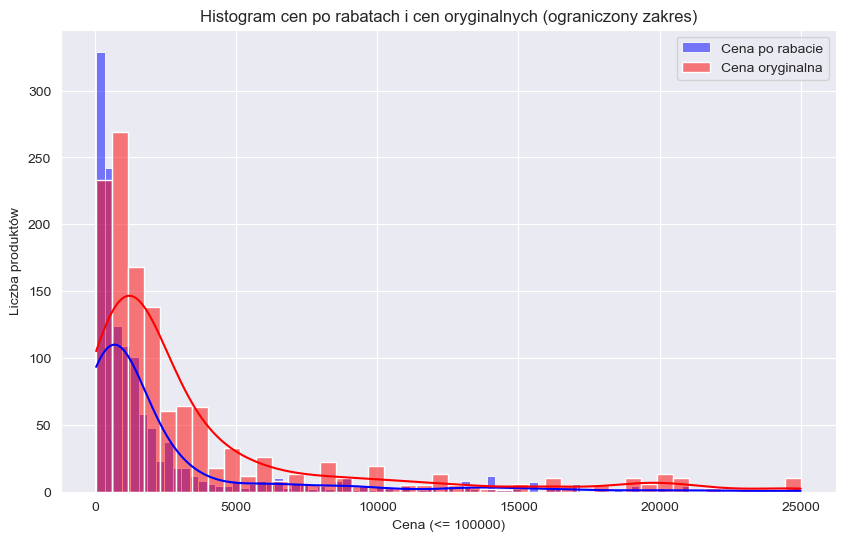

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon[amazon['discounted_price'] <= 25000]['discounted_price'], kde=True, color='blue', label='Cena po rabacie')
sns.histplot(amazon[amazon['actual_price'] <= 25000]['actual_price'], kde=True, color='red', label='Cena oryginalna')
plt.legend()
plt.title('Histogram cen po rabatach i cen oryginalnych (ograniczony zakres)')
plt.xlabel('Cena (<= 100000)')
plt.ylabel('Liczba produktów')
plt.grid(True)
plt.show()


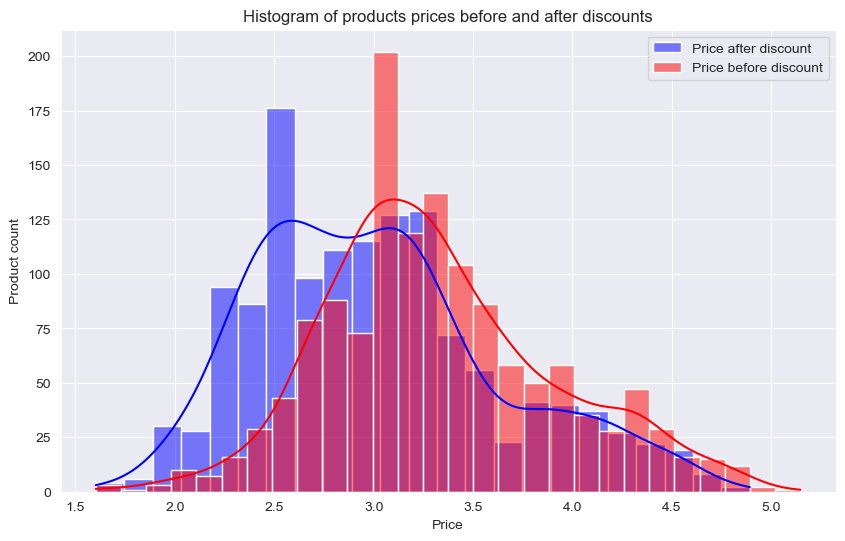

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log10(amazon['discounted_price'] + 1), kde=True, color='blue', label='Price after discount')
sns.histplot(np.log10(amazon['actual_price'] + 1), kde=True, color='red', label='Price before discount')
plt.legend()
plt.title('Histogram of products prices before and after discounts')
plt.xlabel('Price')
plt.ylabel('Product count')
plt.grid(True)
plt.show()


In [17]:
# Usuń znak '%' i przekonwertuj na typ numeryczny
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%', '').astype(float)
amazon.head(500)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,rounded_rating,log_rating_count,category2,general_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,4.2,4.385070,Computers&Accessories,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,4.0,4.643403,Computers&Accessories,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,3.9,3.899218,Computers&Accessories,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,4.2,4.974806,Computers&Accessories,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,4.2,4.228041,Computers&Accessories,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
516,B09JS94MBV,Motorola a10 Dual Sim keypad Mobile with 1750 ...,Electronics,1399.0,1630.0,14.0,4.0,9378.0,4.0,3.972157,Electronics,Electronics
517,B09YV463SW,Fire-Boltt Ninja 3 Smartwatch Full Touch 1.69 ...,Electronics,1499.0,9999.0,85.0,4.2,22638.0,4.2,4.354857,Electronics,Electronics
519,B09NL4DCXK,Flix (Beetel) Bolt 2.4 12W Dual USB Smart Char...,Electronics,249.0,599.0,58.0,3.9,2147.0,3.9,3.332034,Electronics,Electronics
520,B0B8CHJLWJ,Kyosei Advanced Tempered Glass Compatible with...,Electronics,299.0,1199.0,75.0,4.5,596.0,4.5,2.775974,Electronics,Electronics


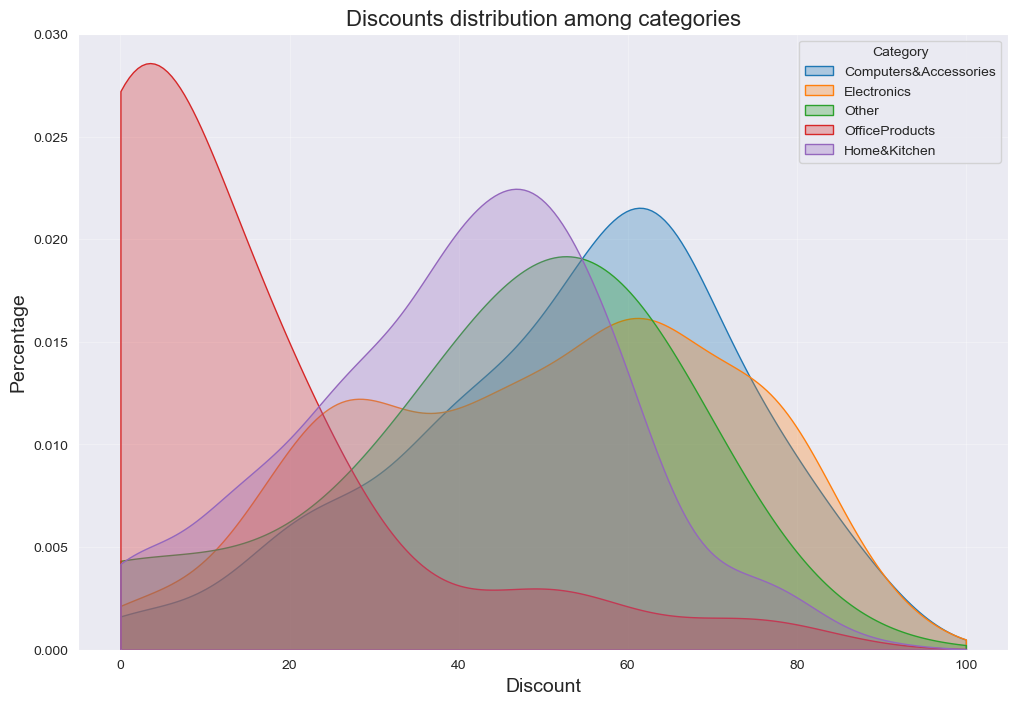

In [18]:
plt.figure(figsize=(12, 8))
for category in amazon['general_category'].unique():
    sns.kdeplot(
        data=amazon[amazon['general_category'] == category], 
        x='discount_percentage', 
        label=category, 
        fill=True, 
        alpha=0.3,
        clip=(0, 100)  # Ensures KDE is plotted only within the valid range
    )
plt.title('Discounts distribution among categories', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Category')
plt.grid(alpha=0.3)
plt.show()

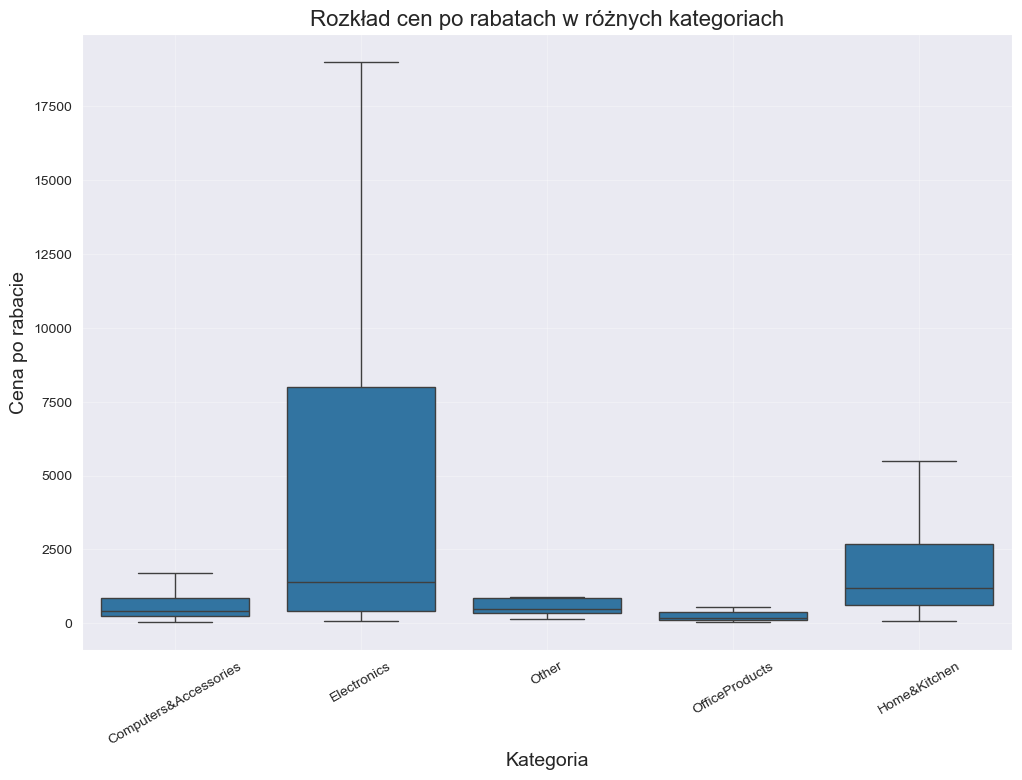

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=amazon, x='general_category', y='discounted_price', showfliers=False)
plt.title('Rozkład cen po rabatach w różnych kategoriach', fontsize=16)
plt.xlabel('Kategoria', fontsize=14)
plt.ylabel('Cena po rabacie', fontsize=14)
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.show()


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/3451541031.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_discount_by_range = amazon.groupby('price_range')['discount_percentage'].mean().reset_index()
/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/3451541031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_discount_by_range, x='price_range', y='discount_percentage', palette='viridis')


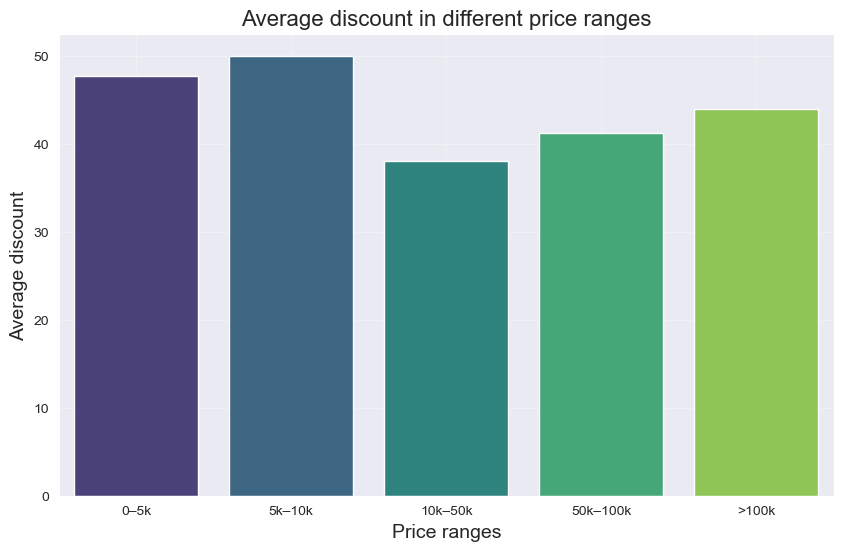

In [20]:
amazon['price_range'] = pd.cut(amazon['actual_price'], bins=[0, 5000, 10000, 50000, 100000, float('inf')], 
                               labels=['0–5k', '5k–10k', '10k–50k', '50k–100k', '>100k'])

avg_discount_by_range = amazon.groupby('price_range')['discount_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_discount_by_range, x='price_range', y='discount_percentage', palette='viridis')
plt.title('Average discount in different price ranges', fontsize=16)
plt.xlabel('Price ranges', fontsize=14)
plt.ylabel('Average discount', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/1317664027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_counts = amazon.groupby(['general_category', 'price_range']).size().unstack()


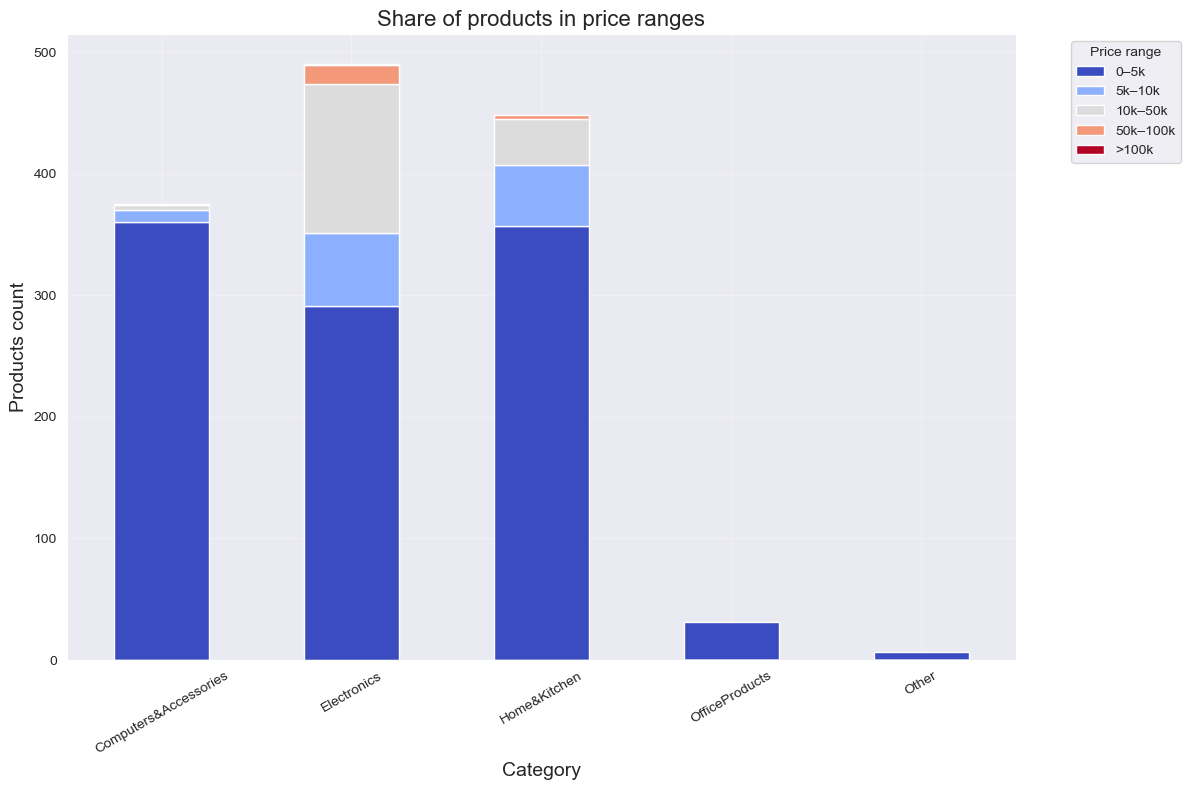

In [21]:
price_category_counts = amazon.groupby(['general_category', 'price_range']).size().unstack()

price_category_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Share of products in price ranges', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Products count', fontsize=14)
plt.xticks(rotation=30)
plt.legend(title='Price range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
    

In [22]:
discount_stats = amazon.groupby('general_category')['discount_percentage'].agg(['mean', 'median', 'max'])
print(discount_stats.sort_values('mean', ascending=False))

                            mean  median   max
general_category                              
Computers&Accessories  53.224000    56.0  94.0
Electronics            49.906122    52.0  91.0
Other                  43.142857    53.0  60.0
Home&Kitchen           40.120536    41.5  90.0
OfficeProducts         12.354839     5.0  75.0


In [23]:
price_variation = amazon.groupby('general_category')['discounted_price'].std()
print(price_variation.sort_values(ascending=False))

general_category
Electronics              10561.542247
Home&Kitchen              3467.403842
Computers&Accessories     2604.746687
Other                      745.981425
OfficeProducts             317.288699
Name: discounted_price, dtype: float64


In [24]:
correlation = amazon['actual_price'].corr(amazon['discount_percentage'])
print(f"Korelacja między ceną oryginalną a rabatem: {correlation:.2f}")

Korelacja między ceną oryginalną a rabatem: -0.11


In [25]:
max_discounts = amazon.loc[amazon.groupby('general_category')['discount_percentage'].idxmax()]
print(max_discounts[['general_category', 'discount_percentage', 'product_name']])


           general_category  discount_percentage  \
695   Computers&Accessories                 94.0   
334             Electronics                 91.0   
1026           Home&Kitchen                 90.0   
702          OfficeProducts                 75.0   
613                   Other                 60.0   

                                           product_name  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...  
334   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...  
1026  beatXP Kitchen Scale Multipurpose Portable Ele...  
702   COI Note Pad/Memo Book with Sticky Notes & Cli...  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...  


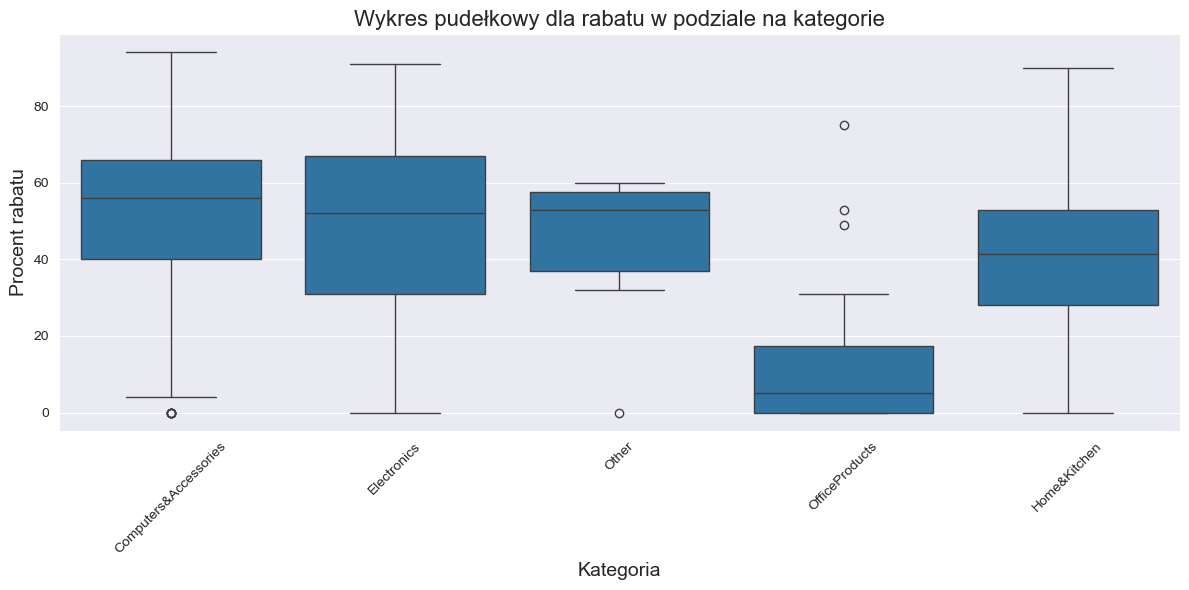

In [26]:
# Wykres pudełkowy dla discount_percentage w podziale na kategorie
plt.figure(figsize=(12, 6))
sns.boxplot(data=amazon, x='general_category', y='discount_percentage')
plt.title('Wykres pudełkowy dla rabatu w podziale na kategorie', fontsize=16)
plt.xlabel('Kategoria', fontsize=14)
plt.ylabel('Procent rabatu', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# Korelacja między ceną oryginalną a rabatem w każdej kategorii
category_correlation = amazon.groupby('general_category').apply(
    lambda x: x['actual_price'].corr(x['discount_percentage'])
)
print(category_correlation)


general_category
Computers&Accessories   -0.091999
Electronics             -0.286274
Home&Kitchen             0.128782
OfficeProducts           0.473252
Other                    0.334461
dtype: float64


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/1014486640.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_correlation = amazon.groupby('general_category').apply(


In [28]:
# Obliczanie średniej ceny po rabacie w każdej kategorii
average_discounted_price = amazon.groupby('general_category')['discounted_price'].mean().sort_values(ascending=False)
print(average_discounted_price)


general_category
Electronics              6225.869388
Home&Kitchen             2330.615647
Computers&Accessories     947.488960
Other                     762.571429
OfficeProducts            301.580645
Name: discounted_price, dtype: float64


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/1461857037.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_rated, x='product_name', y='rating', palette='viridis')
/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/1461857037.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


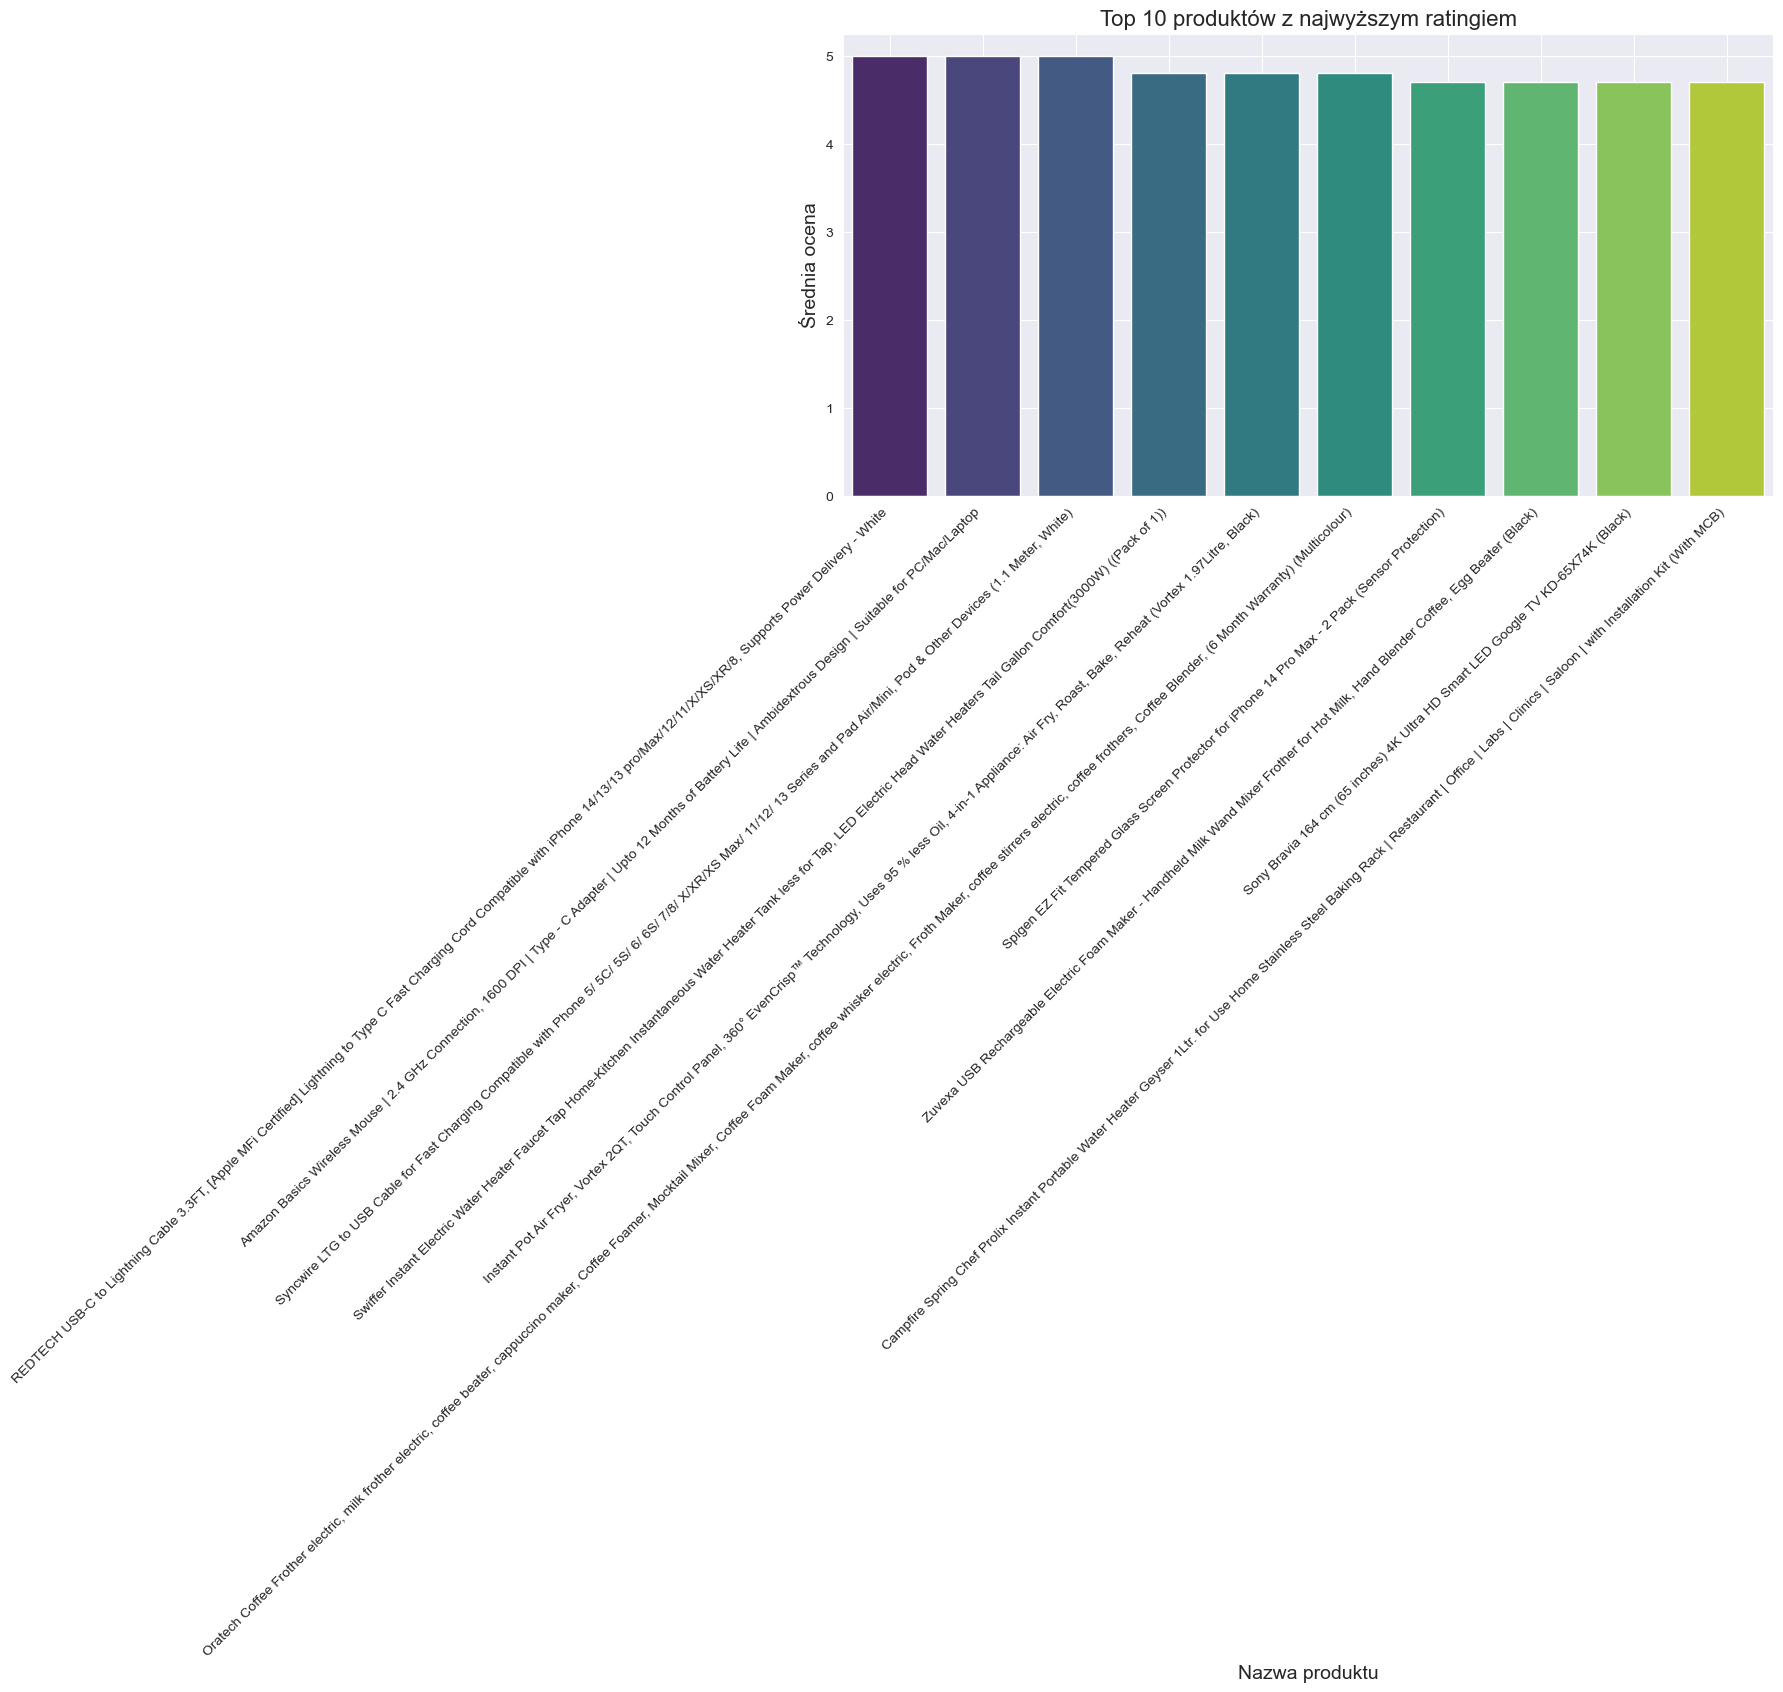

In [29]:
# Sortowanie danych według ratingu i wybór 10 produktów z najwyższymi ocenami
top_10_rated = amazon[['product_name', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Wykres słupkowy
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_rated, x='product_name', y='rating', palette='viridis')
plt.title('Top 10 produktów z najwyższym ratingiem', fontsize=16)
plt.xlabel('Nazwa produktu', fontsize=14)
plt.ylabel('Średnia ocena', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/3702523303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_rating, x='general_category', y='rating', palette='viridis')


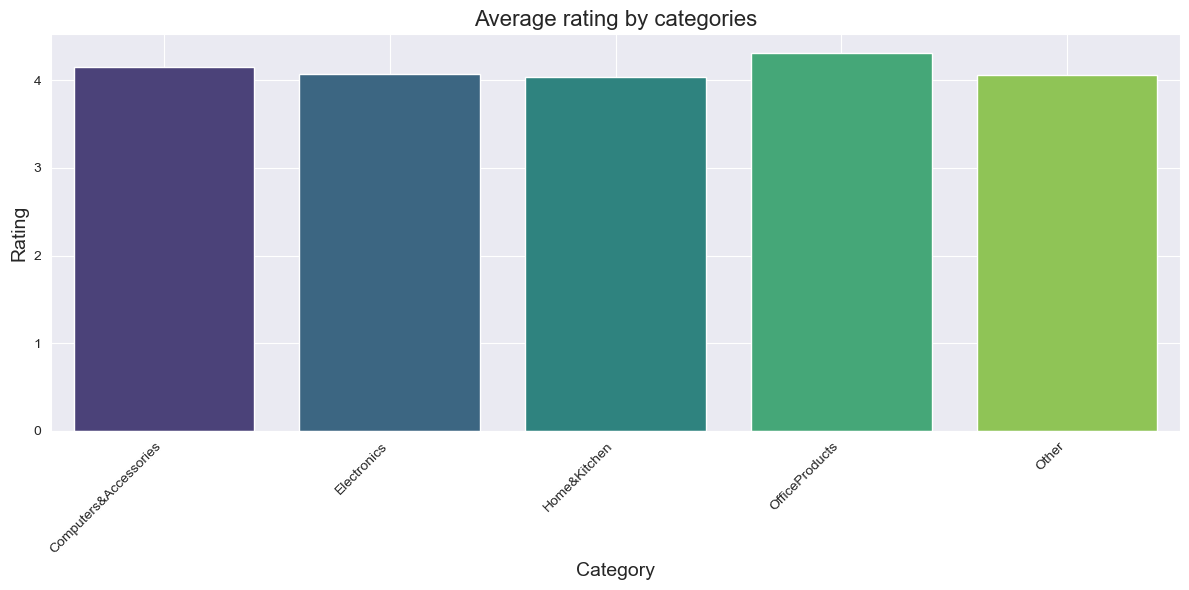

In [30]:
# Obliczanie średnich ocen w podziale na kategorie
category_rating = amazon.groupby('general_category')['rating'].mean().reset_index()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
sns.barplot(data=category_rating, x='general_category', y='rating', palette='viridis')
plt.title('Average rating by categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


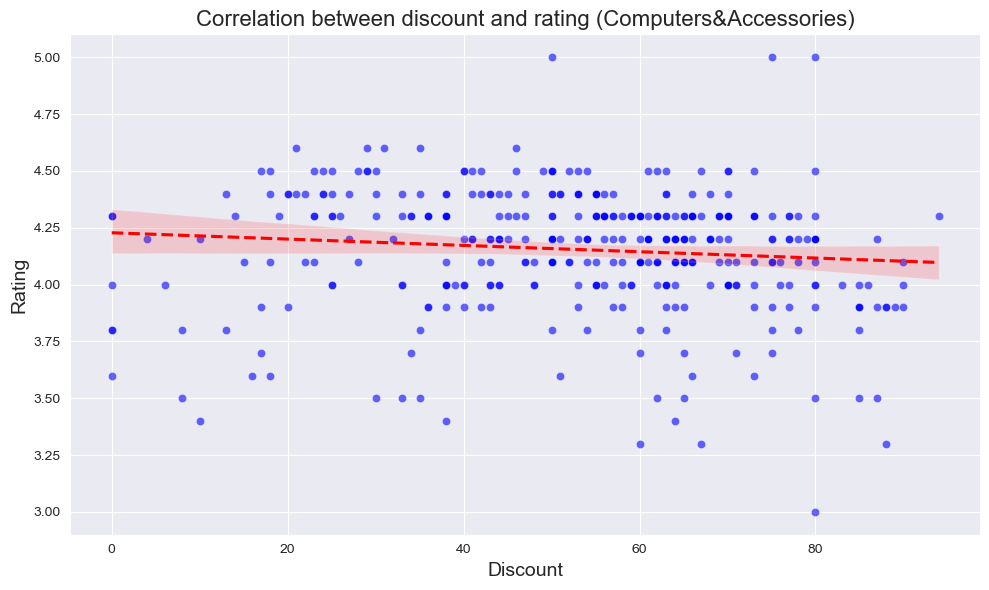

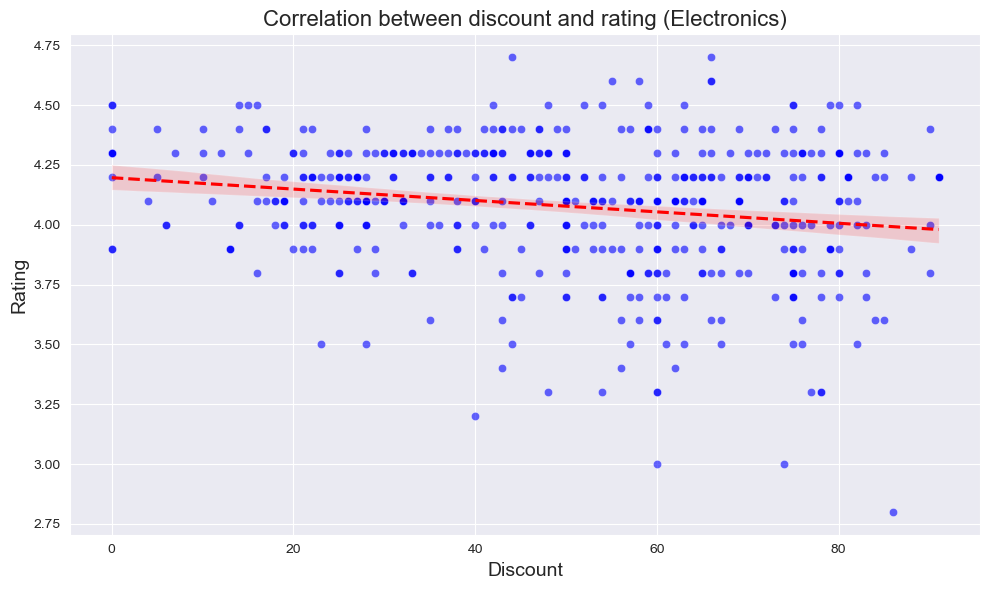

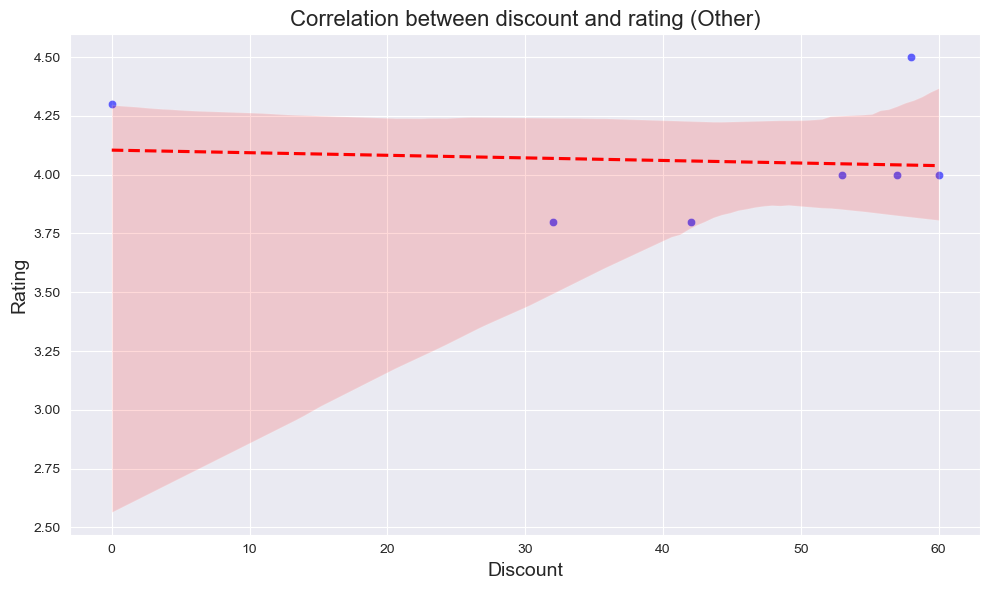

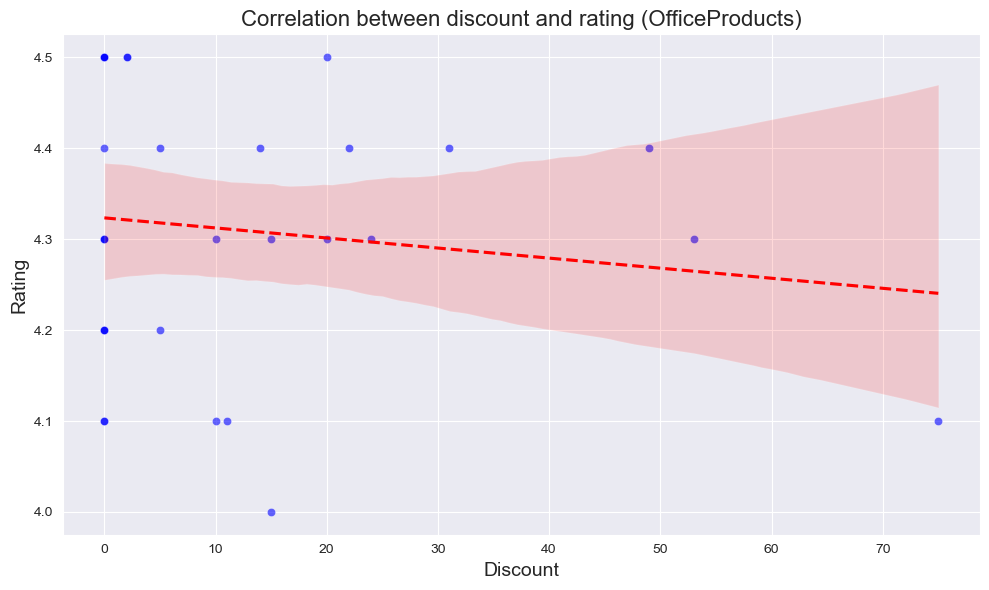

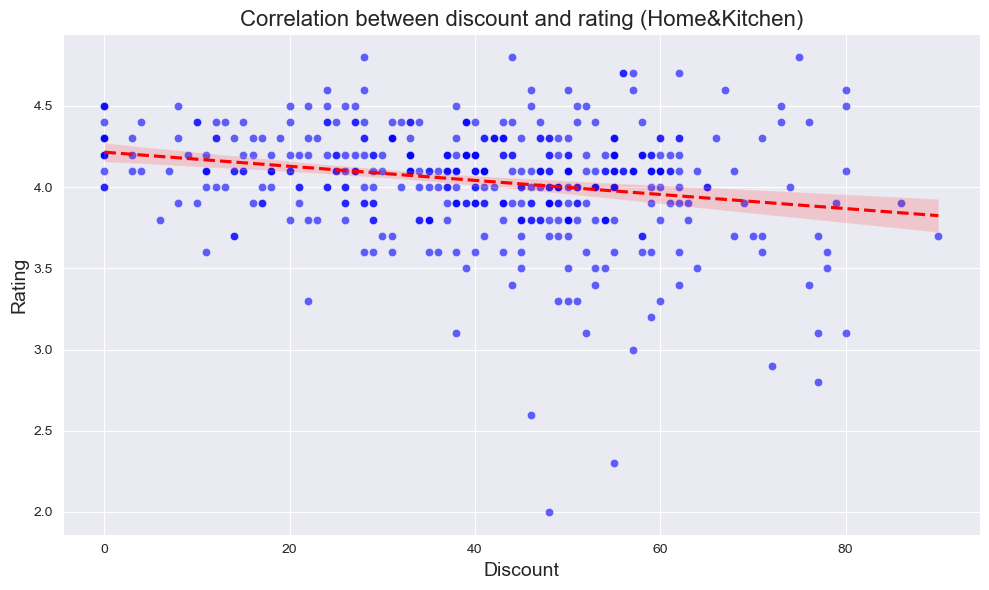

In [31]:
# Rysowanie wykresów zależności rabatu i ratingu osobno dla każdej kategorii
categories = amazon['general_category'].unique()

for category in categories:
    plt.figure(figsize=(10, 6))
    
    # Filtracja danych dla danej kategorii
    category_data = amazon[amazon['general_category'] == category]
    
    # Rysowanie wykresu rozrzutu
    sns.scatterplot(data=category_data, x='discount_percentage', y='rating', alpha=0.6, color='blue')
    
    # Dodanie linii regresji
    sns.regplot(data=category_data, x='discount_percentage', y='rating', scatter=False, color='red', line_kws={'linestyle': '--'})
    
    # Tytuł i etykiety osi
    plt.title(f'Correlation between discount and rating ({category})', fontsize=16)
    plt.xlabel('Discount', fontsize=14)
    plt.ylabel('Rating', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/818864069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_percentage', y='product_name', data=top_10_products_by_discount, palette='viridis')
/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_39089/818864069.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


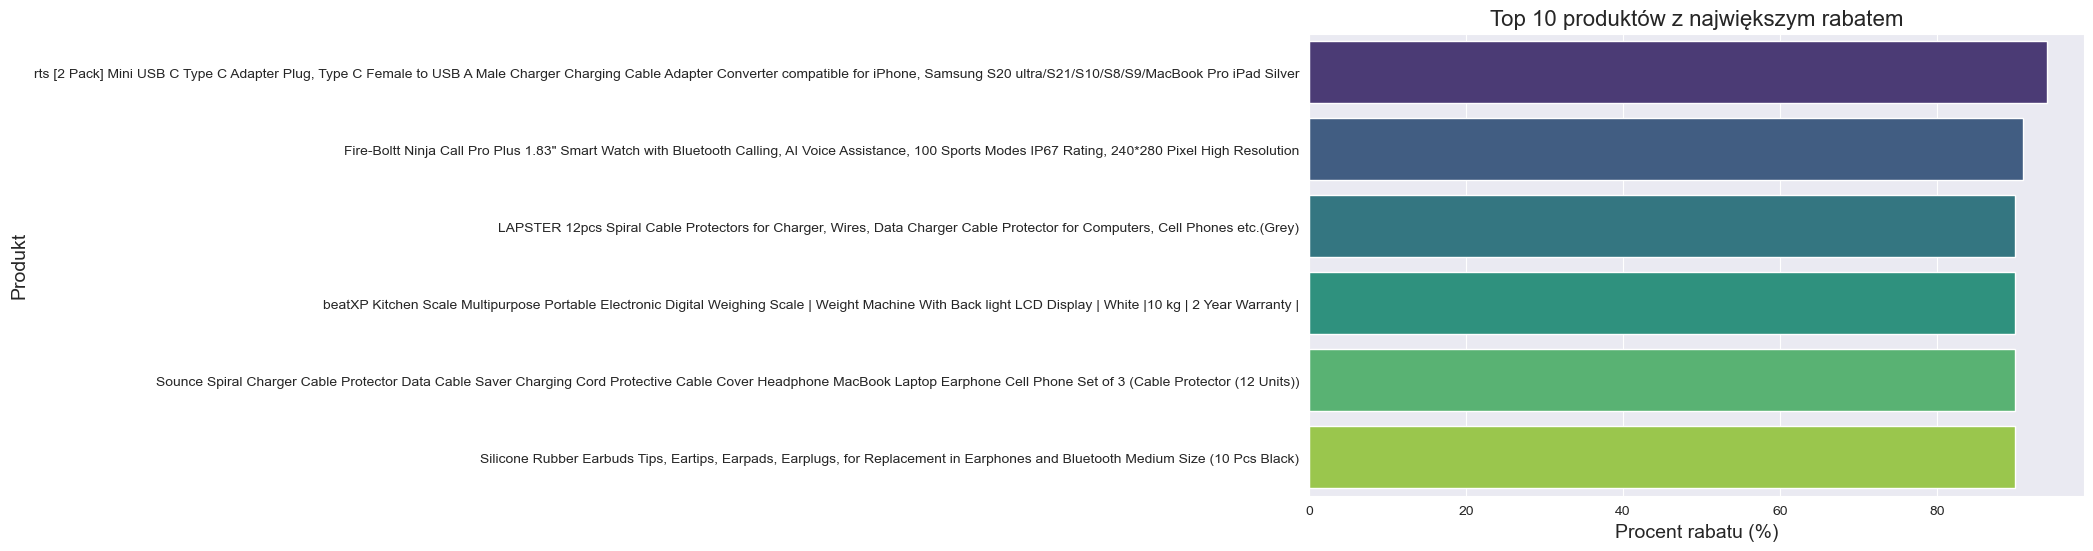

In [32]:
# Posortowanie produktów po rabacie w porządku malejącym
top_10_products_by_discount = amazon[['product_name', 'discount_percentage']].sort_values(by='discount_percentage', ascending=False).head(10)

# Rysowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
sns.barplot(x='discount_percentage', y='product_name', data=top_10_products_by_discount, palette='viridis')

# Tytuł i etykiety osi
plt.title('Top 10 produktów z największym rabatem', fontsize=16)
plt.xlabel('Procent rabatu (%)', fontsize=14)
plt.ylabel('Produkt', fontsize=14)
plt.tight_layout()
plt.show()


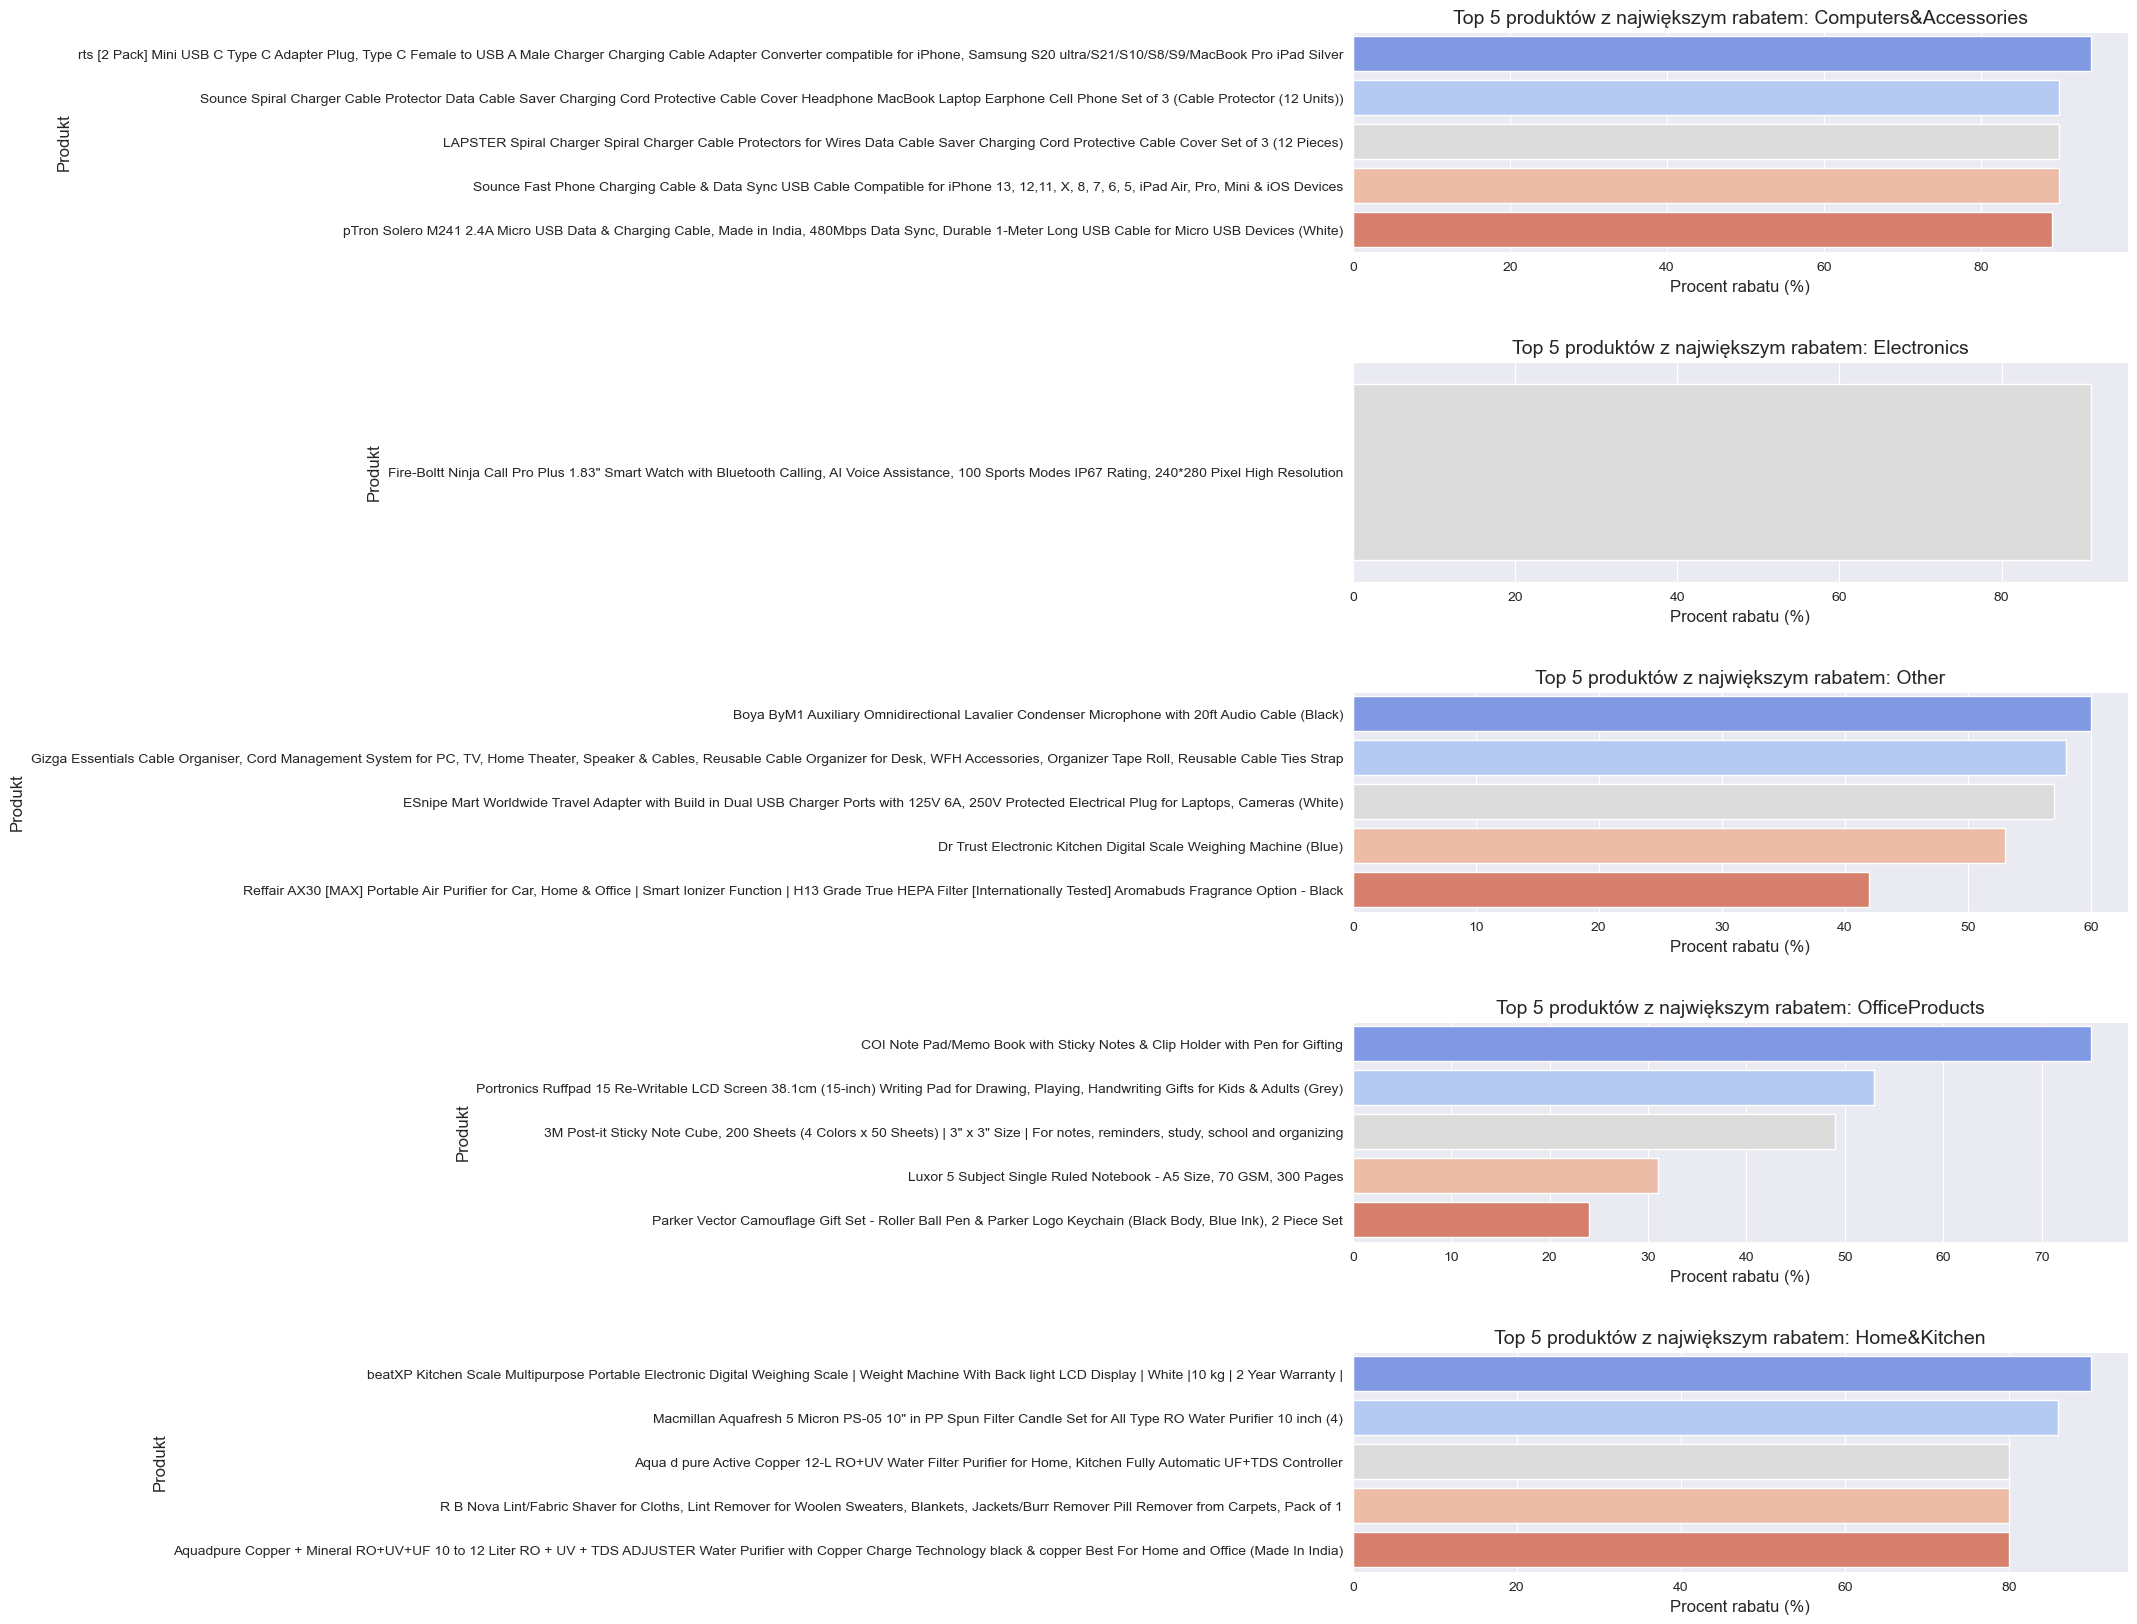

In [33]:
# Grupowanie produktów według kategorii, sortowanie według rabatu i wybieranie top 5
top_5_by_category = amazon.sort_values(by='discount_percentage', ascending=False) \
    .groupby('general_category').head(5).reset_index(drop=True)

# Tworzenie wykresów dla każdej kategorii
categories = amazon['general_category'].unique()

plt.figure(figsize=(10, 20))  # Zwiększamy wysokość wykresów

for i, category in enumerate(categories, 1):
    # Wybieramy produkty dla danej kategorii
    category_data = top_5_by_category[top_5_by_category['general_category'] == category]
    
    plt.subplot(len(categories), 1, i)  # Ustawiamy 1 kolumnę i liczbę wierszy równą liczbie kategorii
    sns.barplot(x='discount_percentage', y='product_name', data=category_data, hue='product_name', palette='coolwarm', legend=False)
    
    # Tytuł i etykiety osi
    plt.title(f'Top 5 produktów z największym rabatem: {category}', fontsize=14)
    plt.xlabel('Procent rabatu (%)', fontsize=12)
    plt.ylabel('Produkt', fontsize=12)

# Dostosowanie układu
plt.subplots_adjust(hspace=0.5)
plt.show()


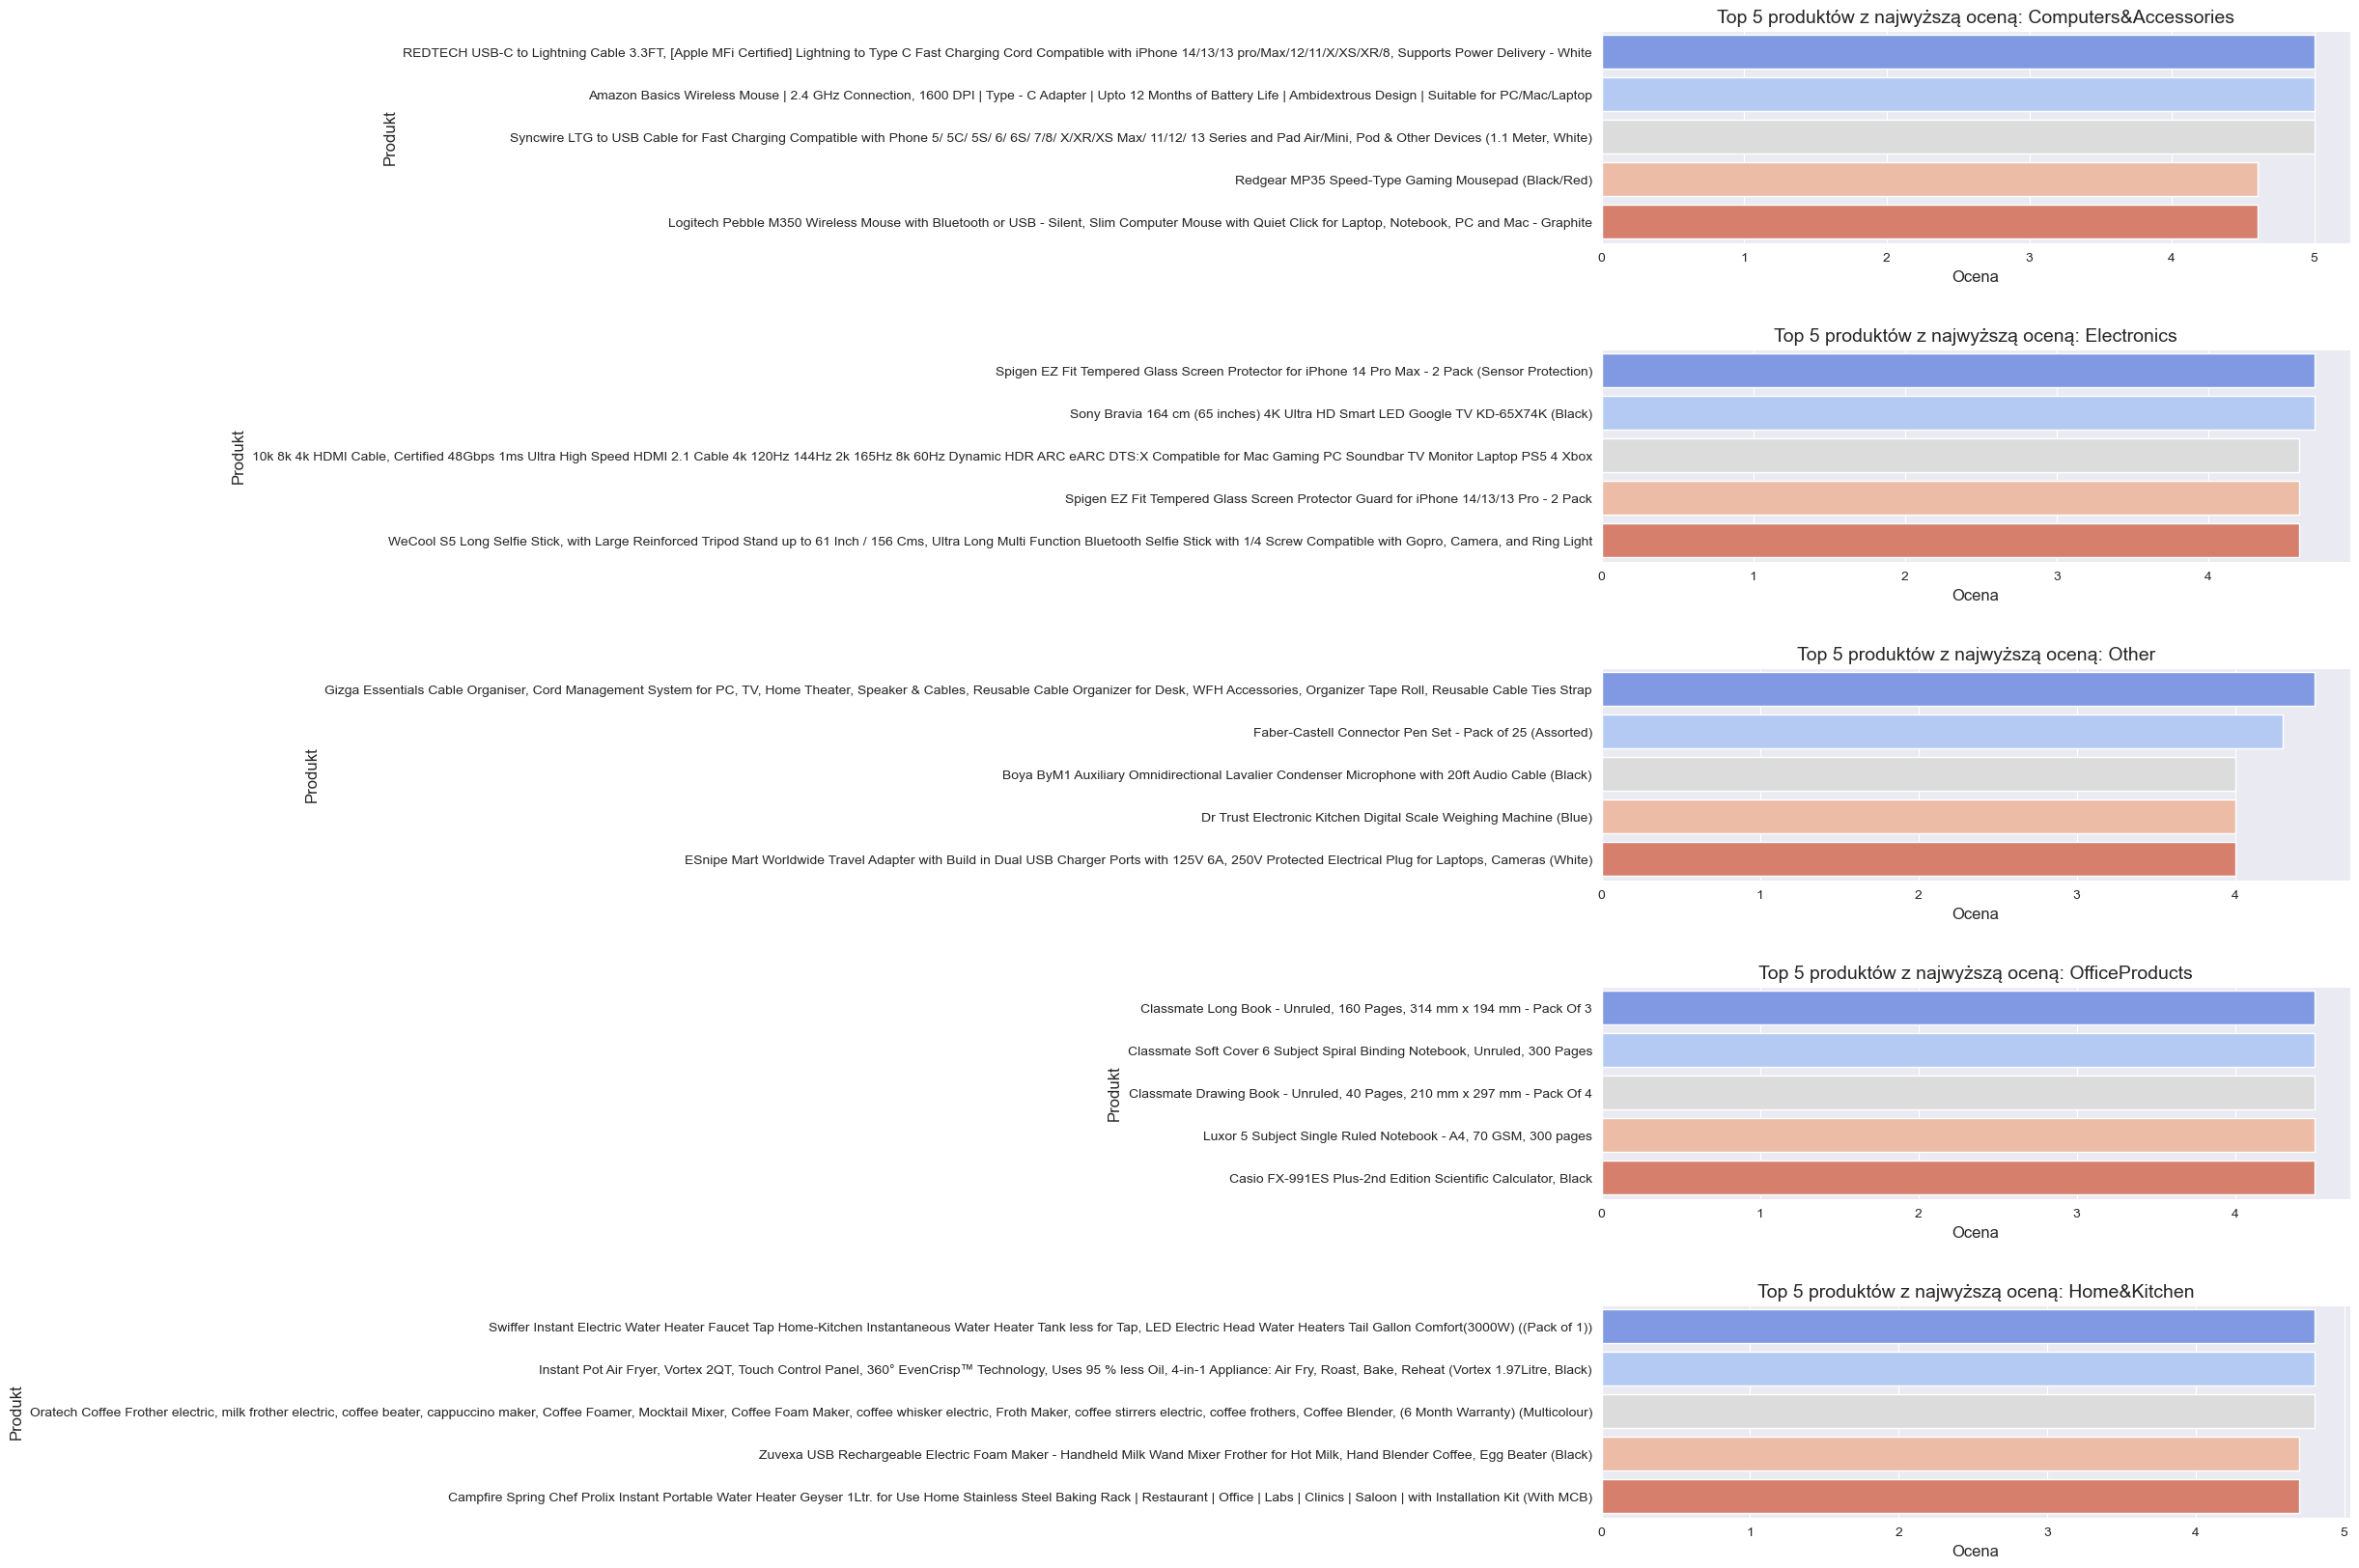

In [34]:
# Grupowanie produktów według kategorii, sortowanie według oceny i wybieranie top 5
top_5_by_category_rating = amazon.sort_values(by='rating', ascending=False) \
    .groupby('general_category').head(5).reset_index(drop=True)

# Tworzenie wykresów dla każdej kategorii
categories = amazon['general_category'].unique()

plt.figure(figsize=(10, 20))  # Zwiększamy wysokość wykresów

for i, category in enumerate(categories, 1):
    # Wybieramy produkty dla danej kategorii
    category_data = top_5_by_category_rating[top_5_by_category_rating['general_category'] == category]
    
    plt.subplot(len(categories), 1, i)  # Ustawiamy 1 kolumnę i liczbę wierszy równą liczbie kategorii
    sns.barplot(x='rating', y='product_name', data=category_data, hue='product_name', palette='coolwarm', legend=False)
    
    # Tytuł i etykiety osi
    plt.title(f'Top 5 produktów z najwyższą oceną: {category}', fontsize=14)
    plt.xlabel('Ocena', fontsize=12)
    plt.ylabel('Produkt', fontsize=12)

# Dostosowanie układu
plt.subplots_adjust(hspace=0.5)
plt.show()


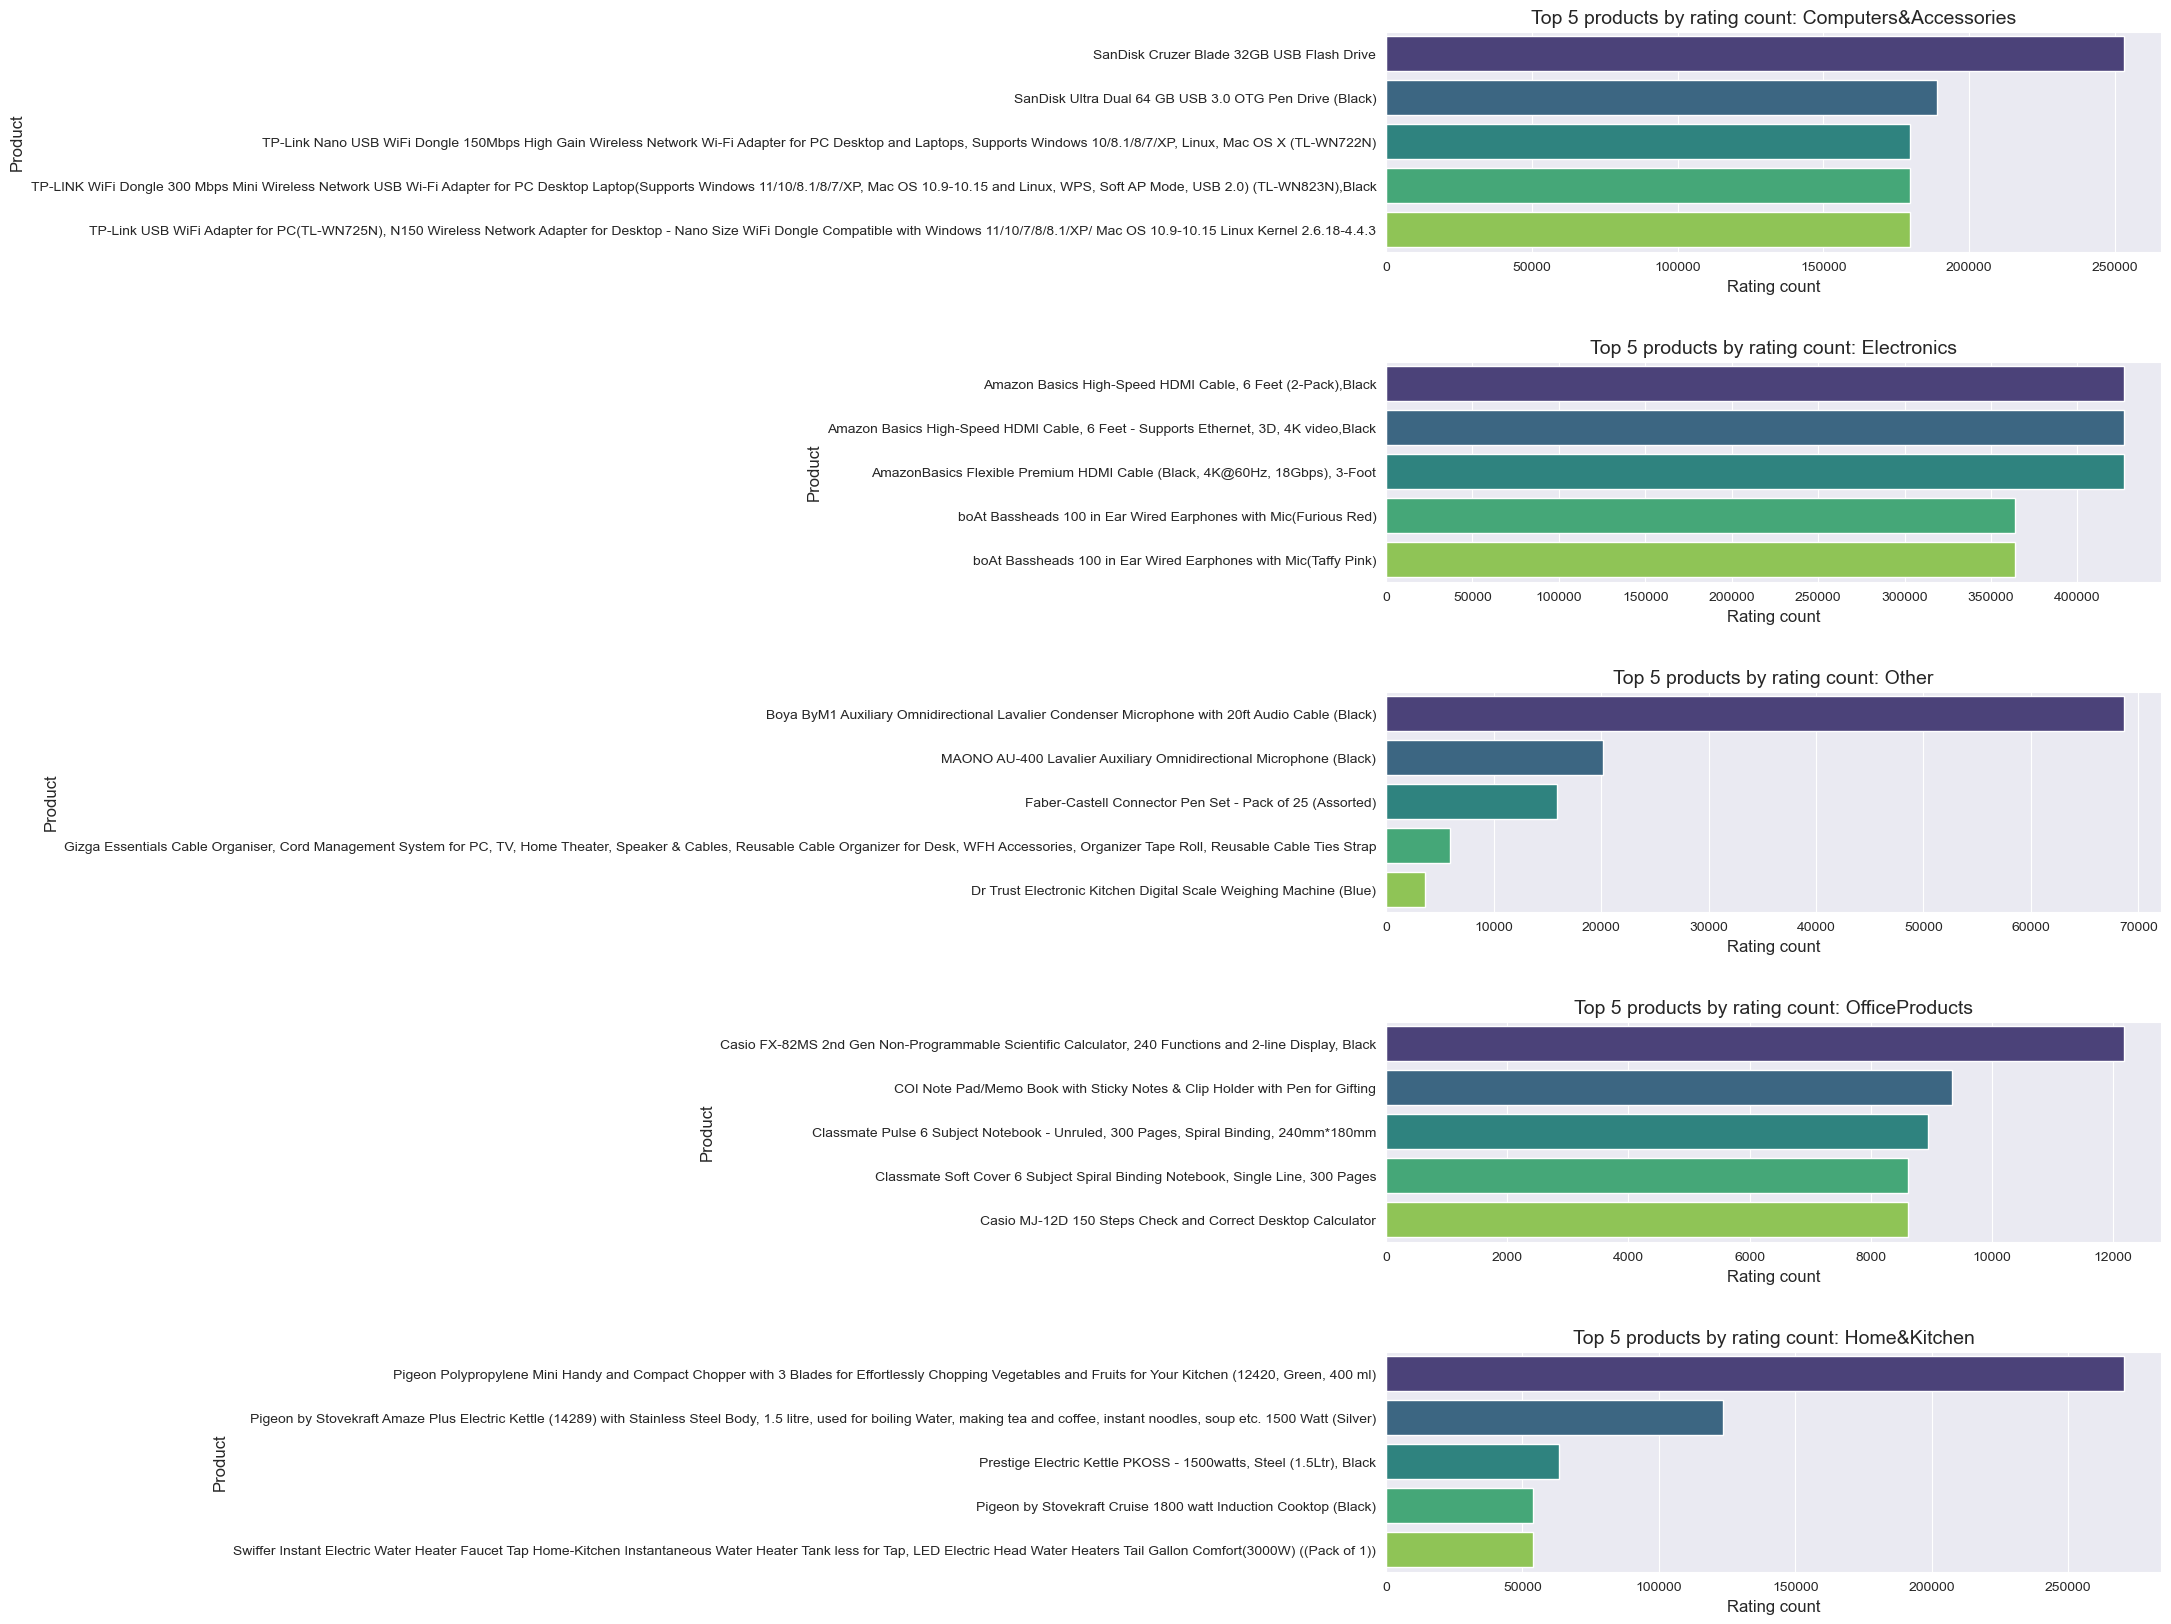

In [39]:
# Grupowanie produktów według kategorii, sortowanie według liczby ocen i wybieranie top 5
top_5_by_category_reviews = amazon.sort_values(by='rating_count', ascending=False) \
    .groupby('general_category').head(5).reset_index(drop=True)

# Tworzenie wykresów dla każdej kategorii
categories = amazon['general_category'].unique()

plt.figure(figsize=(10, 20))  # Zwiększamy wysokość wykresów

for i, category in enumerate(categories, 1):
    # Wybieramy produkty dla danej kategorii
    category_data = top_5_by_category_reviews[top_5_by_category_reviews['general_category'] == category]
    
    plt.subplot(len(categories), 1, i)  # Ustawiamy 1 kolumnę i liczbę wierszy równą liczbie kategorii
    sns.barplot(x='rating_count', y='product_name', data=category_data, hue='product_name', palette='viridis', legend=False)
    
    # Tytuł i etykiety osi
    plt.title(f'Top 5 products by rating count: {category}', fontsize=14)
    plt.xlabel('Rating count', fontsize=12)
    plt.ylabel('Product', fontsize=12)

# Dostosowanie układu
plt.subplots_adjust(hspace=0.5)
plt.show()


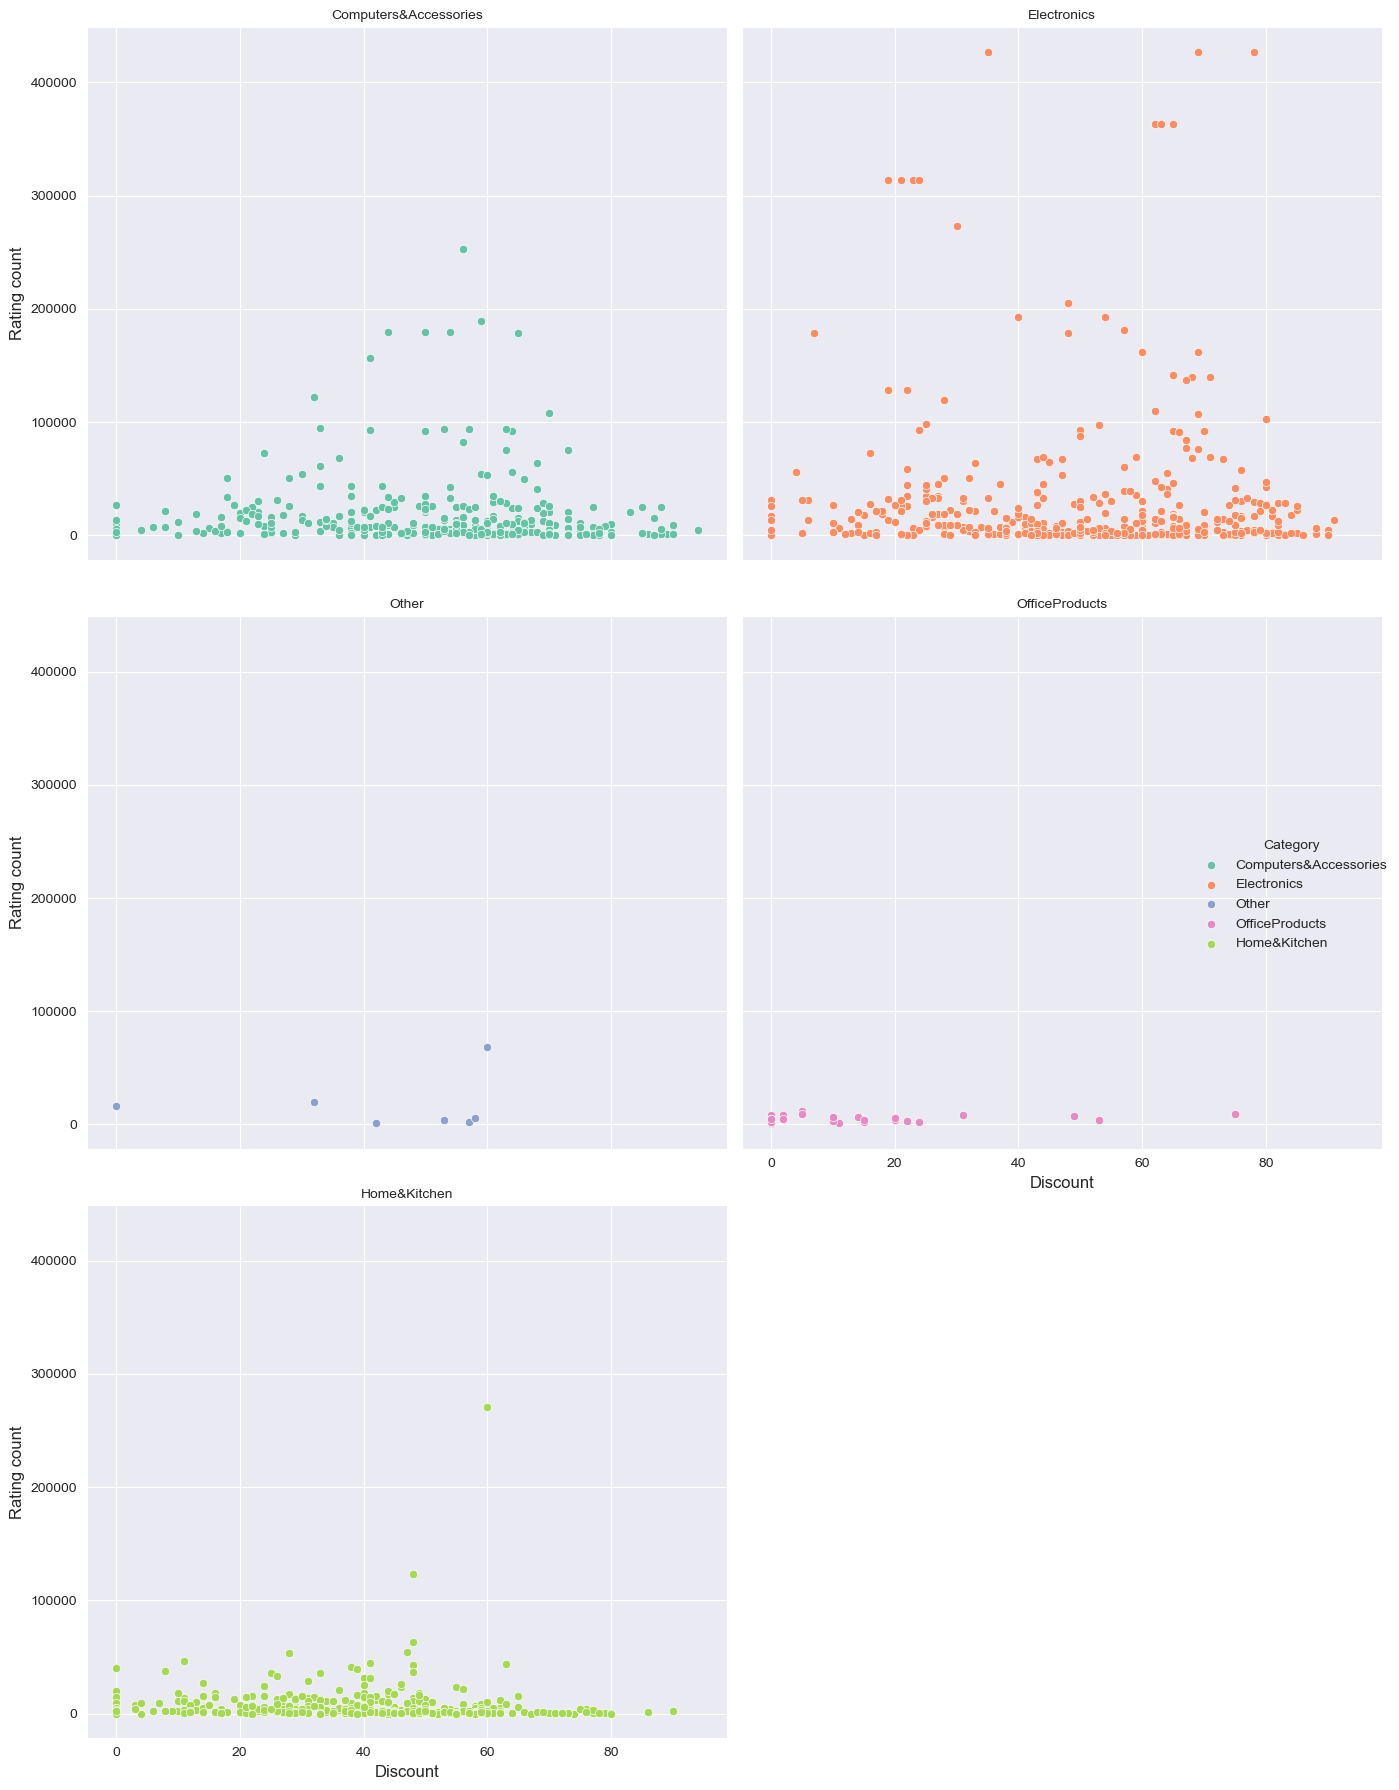

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrujemy dane na 4 kategorie
categories = amazon['general_category'].unique()

# Tworzymy obiekt FacetGrid do podzielenia wykresu na 4 części
g = sns.FacetGrid(amazon, col='general_category', col_wrap=2, height=6, hue='general_category', palette='Set2')

# Rysowanie wykresu na każdym podziale
g.map(sns.scatterplot, 'discount_percentage', 'rating_count')

# Dostosowanie tytułów, etykiet osi i legendy
g.set_axis_labels('Discount', 'Rating count', fontsize=12)
g.set_titles(col_template="{col_name}", fontsize=14)
g.add_legend(title='Category')

# Dostosowanie układu
plt.tight_layout()
plt.show()


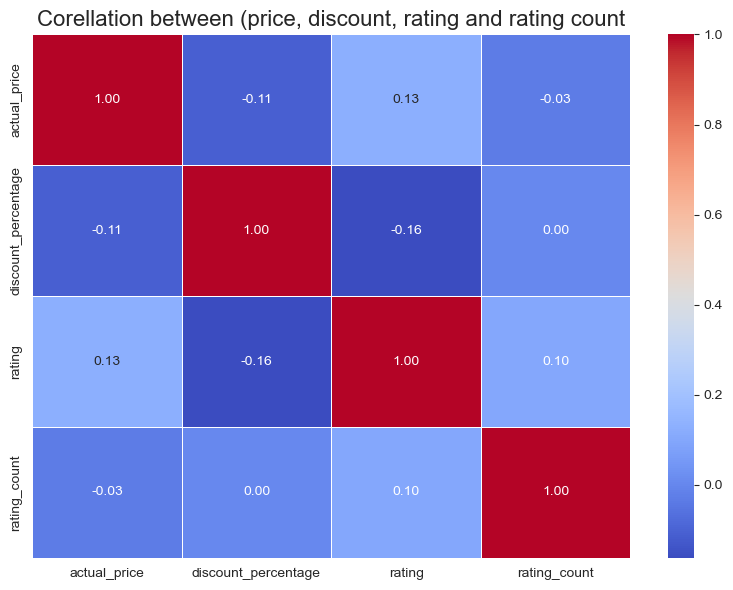

In [37]:
# Oblicz korelację pomiędzy wybranymi cechami
correlation_matrix = amazon[['actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Tytuł wykresu
plt.title('Corellation between (price, discount, rating and rating count', fontsize=16)
plt.tight_layout()
plt.show()